In [11]:
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import pyarrow.parquet as pq
import fastparquet
import pandas as pd
import glob
import numpy as np
import re
import matplotlib.pyplot as plt

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_colwidth = 3000

In [12]:
ballad = pd.read_csv("../../data/data_ballad/melon_ballad_1_15000.csv")
ballad.sample(2)

,제목,가사,가수,발매일,좋아요수,장르
8844,Galaxy Dust,Your love Your love\n눈을 감고 널 그려보려 해\n작은 소음도 없이 고요해 넌\n깊고 광활한 네 품에 날 맡기기에\n난 작은 점인 채\n중력을 잃어 Fly away\n둘만의 미로\n흐르는 River\n줄기를 따라 닿은 Wonder place\nWonder place\n낮은 물소리\n네게 이끌린\n나의 두 손을 흠뻑 적시길 You\n네 꿈에 잠긴 별에서\n조용히 난 눈을 떠\nMake me feel like a galaxy dust\nMake me feel like a galaxy dust\n태양과 달도 네게선\n작은 별일뿐인 걸\nLet me feel like a galaxy dust\nLet me feel like a galaxy dust\n넌 궤도 없는 Dreaming\n빛보다 빠른 Feeling\n그 안에 갇힌 Me and you\nOh 잊지 못할 Love crush\n더 날아들어\nMake me feel like a galaxy dust\nMake me feel like a galaxy dust\n깊고 투명한 감각을 거닐다\n마음이 가리킨 그곳에 번진 빛\n간직하고 싶은 모든 기억 너머에\n넌 나를 비춘 채 따스히 번져 가 Always\n이루고 싶은 소원을 빌어\n이어진 순간 여긴 On the cloud\nOn the cloud\n고운 목소리 헤일 수 없이\n눈부신 별이 되어 번져갈 You\n네 꿈에 잠긴 별에서\n조용히 난 눈을 떠\nMake me feel like a galaxy dust\nMake me feel like a galaxy dust\n태양과 달도 네게선\n작은 별일뿐인 걸\nLet me feel like a galaxy dust\nLet me feel like a galaxy dust\n넌 궤도 없는 Dreaming\n빛보다 빠른 Feeling\n그 안에 갇힌 Me and you\nOh 잊지 못할 Love crush\n더 날아들어\nMake me feel like a galaxy dust\nMake me feel like a galaxy dust\n저 푸른 빛 달 너머 날 이끈 Your way\nGalaxy Galaxy Galaxy of us\nGalaxy Galaxy Galaxy of us\n오로라 빛 스며든 그 색을 칠해 You\nGalaxy Galaxy Galaxy of us\n네 꿈에 잠긴 별에서\n조용히 난 눈을 떠\nMake me feel like a galaxy dust\nMake me feel like a galaxy dust\n태양과 달도 네게선\n작은 별일뿐인 걸\nLet me feel like a galaxy dust\nLet me feel like a galaxy dust\n난 별을 딛고 Climbing\n무한함 속의 Chilling\n그 꿈에 닿은 Me and you\n기적 같은 Timing\nOh 날 이끌어\nMake me feel like a galaxy dust\nMake me feel like a galaxy dust,하성운,2021.08.09,"4,332",발라드
5520,어쩌다가 (New Ver.),어쩌다가 널 사랑했나봐\n죽을만큼 널 사랑했나봐\n난 아직까지 그리운걸보면\n아직도 널 사랑하나봐\n어쩌다가 우리 이별하나봐\n나 없이도 잘 살 널 생각하면\n나 아프고 또 아파 눈물만 나\n왜 이렇게 니 행복이 싫은지,전초아,2005.08.11,"2,996",발라드


In [13]:
dance = pd.read_csv("../../data/data_genre/melon_dance_total.csv")
dance.sample(2)

,제목,가사,장르
9977,Na Na Na (Feat. 자두),널 기다리고픈 이 밤에\r\n너무 보고싶다 말 못해\r\n이런 내 마음을 너는 아는지\r\n그때 네 목소리 아직도\r\n내게 잊혀지지 않아요\r\n아직 그대 내 맘에\r\neverytime my love is\r\nalways with u 보고파\r\n너 하나 밖에 없는\r\n내 맘을 아는지\r\nI will always be u 그대와\r\n이런 내 맘을 받아요\r\nlove 아무도 모르줘\r\n내 맘은 너에게\r\n그럴 때마다 난 자꾸 웃음짓고\r\nlove그대를 갖고 싶죠\r\n안에 영원히\r\n그대 표정 잊어지지 않죠\r\n\r\n그대만을 원하고 또 바라고\r\n이제는 나 그대만을 가지고\r\nWhere u go\r\nflow FLOW 너 하나 뿐인데\r\n너는 왜 내가\r\none step two step\r\n그대와 매일 love again\r\nwanna be your superman\r\n운명이라 필연인데\r\nbe my huge fan\r\n말 못하는 내가 정말 싫어서\r\n이대로만 있소\r\neverytime my love is\r\nalways with u 보고파\r\n너 하나 밖에 없는\r\n내 맘을 아는지\r\nI will always be u 그대와\r\n이런 내 맘을 받아요\r\nlove 아무도 모르줘\r\n내 맘은 너에게\r\n그럴 때마다 난 자꾸 웃음짓고\r\nlove그대를 갖고 싶죠\r\n안에 영원히\r\n그대 표정 잊어지지 않죠\r\n그대와 함께 가길 원하고\r\n그대는 나만 지켜주길 바라고\r\n이 모든 게 상상이라고 해도\r\nLet me do that do that do\r\nthat 1 and 2 and 2 and\r\n그대와 가길 forever\r\n이제는 나만 바라보길 whenever\r\n이런 나의 맘 알길 기도해\r\nsay 1 2 3 4\r\nbounds bounds bounds\r\nlove 아무도 모르줘\r\n내 맘은 너에게\r\n그럴 때마다 난 자꾸 웃음짓고\r\nlove그대를 갖고 싶죠\r\n안에 영원히\r\n그대 표정 잊어지지 않죠\r\n날 잊어요 알아요\r\n내 맘을 모르줘\r\n그럴 때마다 난 슬픈 눈물짓고\r\n널 떠나 보냈줘\r\n이제 내 맘 영원히\r\n그대 표정 다 잊어갈래요,댄스
202,파라다이스 (Feat. 김윤재),이른 아침 일어나\r\n창가를 비추는 햇살\r\n아침을 고민하다\r\n달콤한 커피와 크루아상\r\n창밖을 바라보다\r\n마주한 고양이와\r\n잠깐의 눈인사로\r\n기분좋은 나의 아침이야\r\n소소해도 확실한 행복이 필요해\r\n기다리다 지쳐버리면 소용없잖아\r\n여 기 는 paradise\r\n특 별 한건 없어도\r\n기 분 좋은 하루가\r\n계속 되는건 큰 행운이야\r\n맞잡은 너의 손에도\r\n버스안 빈자리에도\r\n우연한 만남속에도\r\n행복할 이유는 가득이야\r\n아침늦게 일어나\r\n나를 비추는 햇살\r\n아점을 고민하다\r\n달달한 커피와 크루아상\r\n나만을 바라보는\r\n자그만 강아지와\r\n공원을 산책하는\r\n기분좋은 나의 아침이야\r\n소소해도 확실한 행복이 필요해\r\n기다리다 지쳐버리면 소용없잖아\r\n여 기 는 paradise\r\n특 별 한건 없어도\r\n기 분 좋은 하루가\r\n계속 되는건 큰 행운이야\r\n너를 피곤하게 만드는\r\n많은 일들에 신경쓰지마\r\n여 기 는 paradise\r\n특 별 한건 없어도\r\n기 분 좋은 하루가\r\n계속 되는건 큰 행운이야\r\n맞잡은 너의 손에도\r\n버스안 빈자리에도\r\n우연한 만남속에도\r\n행복할 이유는 가득이야,댄스


In [14]:
# 가사의 총 길이와, 단어 갯수
def setting_len(df):
    df["가사"] = df["가사"].str.strip()
    df["len"] = df["가사"].str.len()
    lyrics = df["가사"]
    df["word_count"] = lyrics.replace("\n", " ", regex=True).map(lambda x : len(x.split()))

In [15]:
setting_len(ballad)
ballad.sample(2)

,제목,가사,가수,발매일,좋아요수,장르,len,word_count
181,넌 감동이었어,미련하게 아무도 모를 것 같아\n태연한 척 지내왔어 너 떠나버린 뒤\n다 알았대 어설픈 나의 눈빛을\n행복했던 지난 날의 나와 너무 달라서\n이별했음을 느낄 수 밖에\n너와 나 정말 그때는 좋았었나봐\n나 화 낼줄도 몰라 내내 즐거웠대\n그래 그랬었지 널 사랑하기에\n세상은 나에겐 커다란 감동이었어\n그 순간을 잊는다면 내가 살아 온\n짧은 세월은 너무나 보잘 것 없어\n되돌려 보려 해 너를 찾으려 해\n너 없이 살아도 멀쩡히 숨은 쉬겠지만\n후회와 그리움만으로는 견딜 수 없어\n하루도 자신이 없어\n초라했대 어설픈 나의 눈빛은\n행복했던 지난 날의 나와 너무 달라서\n이별했음을 느낄 수 밖에\n너와 나 헤어질줄은 아무도 몰랐대\n하루가 너무 짧던 우리의 날들이\n그래 그랬었지 널 사랑하기에\n세상은 나에겐 커다란 감동이었어\n그 순간을 잊는다면 내가 살아 온\n짧은 세월은 너무나 보잘 것 없어\n되돌려 보려 해 너를 찾으려 해\n너 없이 살아도 멀쩡히 숨은 쉬겠지만\n후회와 그리움만으로는 견딜 수 없어\n하루도 자신이 없어 도저히,성시경,2002.07.18,"72,607",발라드,501,142
5229,회전목마,마음과는 반대로 도망가는 내 마음\n그대가 있어 나는 그대가 있어\n행복인 걸 알았네\n우주를 떠다니는 별들처럼\n우리의 사랑도 떠다니나 봐\n주인 없는 낯선 마음에\n이름 하나 남기려 해도\n받아주지를 않네\n매일 같이 무너져\n너라는 파도에\n하루 또 하루 다짐해 봐도\n한 걸음 다가서면\n두 걸음 더 멀어져\n우린 잠시 같은 길을 걸었나 봐\n우린 너무 달라서\n널 안아줄 수 없어\n반대로만 도망가는 마음\n계속 서로를 맴돌아도\n만날 수 없는 틈 사이\n회전목마를 타고 있나 봐\n무언가에 홀린 듯\n너에게 빠져서\n지내온 날들 꿈만 같던 시간\n노을 빛에 번지면\n영원히 빛을 내는 태양처럼\n끝나지 않기만 바랬었나봐\n주인 없는 낯선 마음에\n이름 하나 남기려 해도\n받아주지를 않네\n매일 같이 무너져\n너라는 파도에\n매일매일 또 다짐해 봐도\n한 걸음 다가서면\n두 걸음 더 멀어져\n우린 잠시 같은 길을 걸었나 봐\n우린 너무 달라서 널 안아줄 수 없어\n반대로만 가는 내 마음은\n계속 서로를 맴돌아도\n만날 수 없는 틈 사이\n회전목마를 타고 있나 봐,이아영,2022.11.03,347,"발라드, 국내드라마",507,150


In [16]:
# 가사 길이추가
dance["가사"] = dance["가사"].str.strip()
dance["len"] = dance["가사"].str.len()

In [17]:
# 단어 길이 추가
lyrics = dance["가사"]
dance["word_count"] = lyrics.replace("\n", " ", regex=True).map(lambda x : len(x.split()))
dance["word_count"]

0        466
1        206
2        208
3        259
4        304
        ... 
11064    154
11065    107
11066     66
11067     96
11068    107
Name: word_count, Length: 11069, dtype: int64

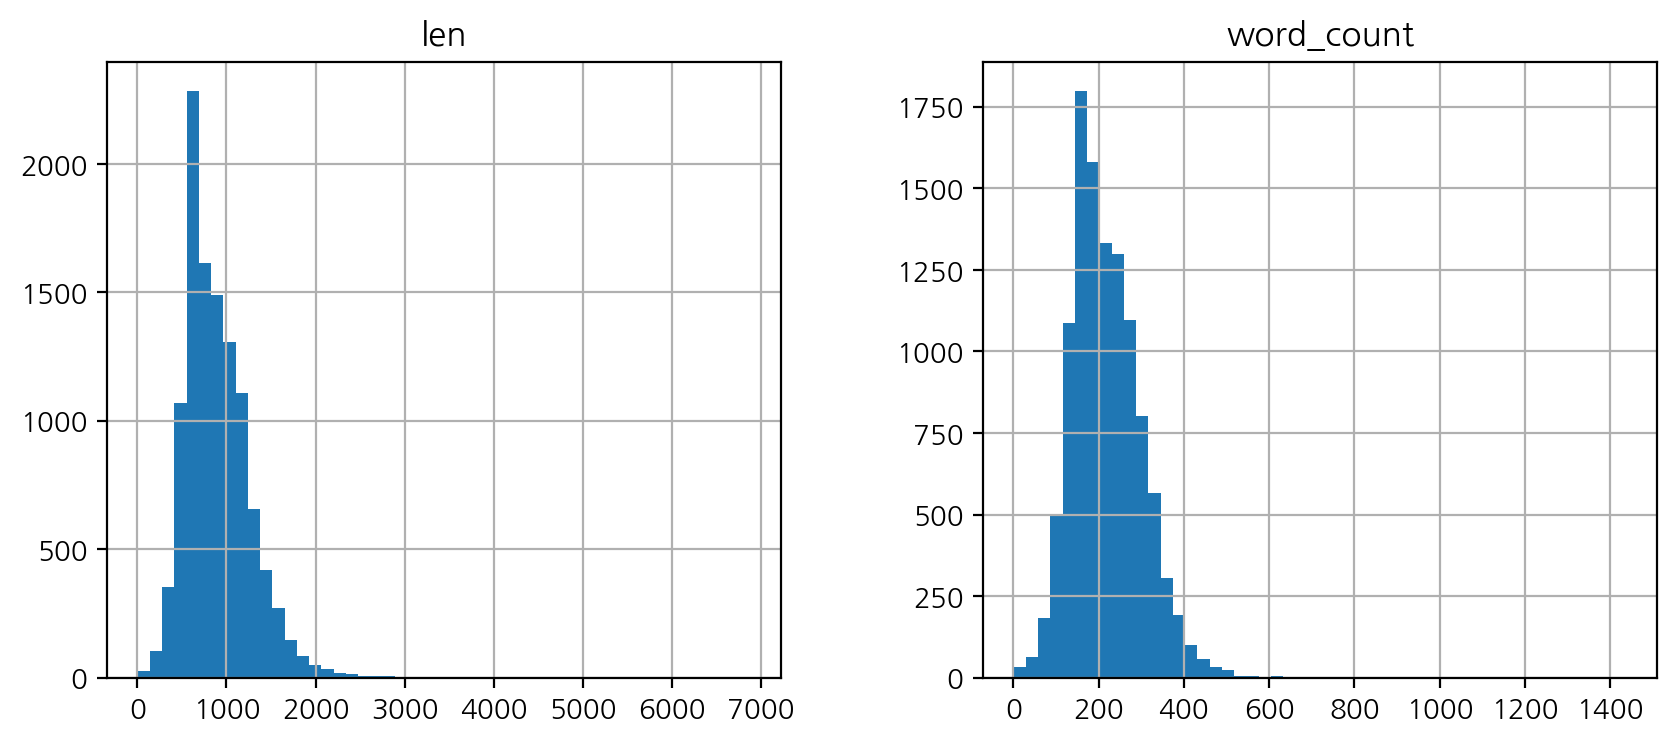

In [18]:
_ = dance.hist(bins=50, figsize=(10,4))

In [19]:
def lyrics_to_array(df):
    df["array"] = df["가사"].map(lambda x : [x.split() for x in x.split("\n")])
    df["max_sentence"] = df["array"].map(lambda x : max([len(s) for s in x]))

In [20]:
lyrics_to_array(ballad)
ballad.sample(2)

,제목,가사,가수,발매일,좋아요수,장르,len,word_count,array,max_sentence
10029,당신이 잠든 사이에,푸른 바다를 담으면 물빛이 되듯이\n나에게 그토록 당연한 행복인걸\n우린 서로에게 달콤한 사랑을 녹이고\n날 덮어주던 미소 포근한 베갯잇처럼\n잠이 들면 우리를 찾아\n오늘을 살 듯이 내일을 살게\n그때 우린 서로를 보며 사랑을 약속해\n우린 서로에게 달콤한 사랑을 녹이고\n날 덮어주던 미소 포근한 베갯잇처럼\n잠이 들면 우리를 찾아\n오늘을 살 듯이 내일을 살게\n그때 우린 서로를 보며 사랑을 약속해,브라더수,2017.10.12,"5,973","발라드, 국내드라마",215,59,"[[푸른, 바다를, 담으면, 물빛이, 되듯이], [나에게, 그토록, 당연한, 행복인걸], [우린, 서로에게, 달콤한, 사랑을, 녹이고], [날, 덮어주던, 미소, 포근한, 베갯잇처럼], [잠이, 들면, 우리를, 찾아], [오늘을, 살, 듯이, 내일을, 살게], [그때, 우린, 서로를, 보며, 사랑을, 약속해], [우린, 서로에게, 달콤한, 사랑을, 녹이고], [날, 덮어주던, 미소, 포근한, 베갯잇처럼], [잠이, 들면, 우리를, 찾아], [오늘을, 살, 듯이, 내일을, 살게], [그때, 우린, 서로를, 보며, 사랑을, 약속해]]",6
5499,겨울처럼,절대 읽고 싶지 않은 책처럼\n그저 한켠에 치웠으면 됐잖아\n저물어버린 하루 끝처럼\n후회 따위 없이 지우면 됐잖아\n겨울처럼 차가운 날만 남았어\n바보같이 또 서럽게 울고만 있어\n흰 눈처럼 홀연히 내리는 추억에\n자꾸 눈물이 흘러\n절대 기억나지 않는 꿈처럼\n잠시라도 널 지우면 좋겠어\n빛바랜 사진 속의 너처럼\n지나간 일인 듯 웃으면 좋겠어\n겨울처럼 차가운 날만 남았어\n바보같이 또 혼자서 울고만 있어\n흰 눈처럼 선명히 쌓이는 흔적에\n자꾸 눈물이 흘러\n지난 기억 속의 널 떠올려봐도\n몇 번이나 시간을 돌려봐도\n행복했던 너여서\n웃고 있는 너여서\n지울 수가 없어서\n눈물이 흘러\n겨울처럼 차가운 날만 남았어\n바보같이 또 서럽게 울고만 있어\n흰 눈처럼 홀연히 내리는 추억에\n너무나 힘들어\n겨울처럼 차가운 날만 남았어\n또 울고만 있어\n흰 눈처럼 차갑게 추억이 내려\n자꾸 눈물이 흘러,ODD-CAT (오드캣),2020.12.10,188,발라드,426,118,"[[절대, 읽고, 싶지, 않은, 책처럼], [그저, 한켠에, 치웠으면, 됐잖아], [저물어버린, 하루, 끝처럼], [후회, 따위, 없이, 지우면, 됐잖아], [겨울처럼, 차가운, 날만, 남았어], [바보같이, 또, 서럽게, 울고만, 있어], [흰, 눈처럼, 홀연히, 내리는, 추억에], [자꾸, 눈물이, 흘러], [절대, 기억나지, 않는, 꿈처럼], [잠시라도, 널, 지우면, 좋겠어], [빛바랜, 사진, 속의, 너처럼], [지나간, 일인, 듯, 웃으면, 좋겠어], [겨울처럼, 차가운, 날만, 남았어], [바보같이, 또, 혼자서, 울고만, 있어], [흰, 눈처럼, 선명히, 쌓이는, 흔적에], [자꾸, 눈물이, 흘러], [지난, 기억, 속의, 널, 떠올려봐도], [몇, 번이나, 시간을, 돌려봐도], [행복했던, 너여서], [웃고, 있는, 너여서], [지울, 수가, 없어서], [눈물이, 흘러], [겨울처럼, 차가운, 날만, 남았어], [바보같이, 또, 서럽게, 울고만, 있어], [흰, 눈처럼, 홀연히, 내리는, 추억에], [너무나, 힘들어], [겨울처럼, 차가운, 날만, 남았어], [또, 울고만, 있어], [흰, 눈처럼, 차갑게, 추억이, 내려], [자꾸, 눈물이, 흘러]]",5


In [21]:
dance["array"] = dance["가사"].map(lambda x : [x.split() for x in x.split("\n")])
dance["array"][0]

[['스위치를', '켜'],
 ['주사위를', '던져', 'Let’s', 'game', 'start'],
 ['아무도', '몰래', '살짝', '떨리는', '두', '다리'],
 ['설레는', '내', '맘이', '두근두근거리는', '걸'],
 ['Turn', 'it', 'up', 'turn', 'it', 'up'],
 ['Check', 'it', 'out', 'the', 'course'],
 ['방심은', '금물'],
 ['남다른', '내', '포스'],
 ['your', 'gonna', 'be', 'surprised'],
 ['복잡한', '트랙을', '거쳐', '건넌'],
 ['south', 'of', 'the', 'river'],
 ['모두가', '집중할', '걸'],
 ['like', 'a', 'super', 'star'],
 ['꿈꾸던', '모험', '앞에', '다가올'],
 ['trouble', 'and', 'pain'],
 ['험난해도', '그', '무엇도', '날', '막진', '못', '해'],
 ['모두', '다', 'knock', 'down'],
 ['더', '크게', '볼륨', 'up', 'up', 'up', 'up', 'up'],
 ['더', '빨리', 'touch', 'down', 'down'],
 ['down', 'down', 'down', 'Now'],
 ['이제', '시작이야', '모든', '걸', '쏟아내'],
 ['보여줄게', '넌'],
 ['Game', 'over', 'It’s', 'game', 'game', 'over'],
 ['더', '도망쳐봐', '너를', '향해'],
 ['shot', 'shot', 'shot', 'shot'],
 ['Game', 'over', 'It’s', 'game'],
 ['game', 'over'],
 ['다', '끄떡없어', 'pop', 'pop'],
 ['wanna', 'make', 'you', 'shut', 'down'],
 ['환호해', '이건', '나의', '축제'],
 ['말해', '

In [22]:
# 가장 긴 문장길이
dance["max_sentence"] = dance["array"].map(lambda x : max([len(s) for s in x]))
dance["max_sentence"].max(), dance["max_sentence"].min()

(245, 1)

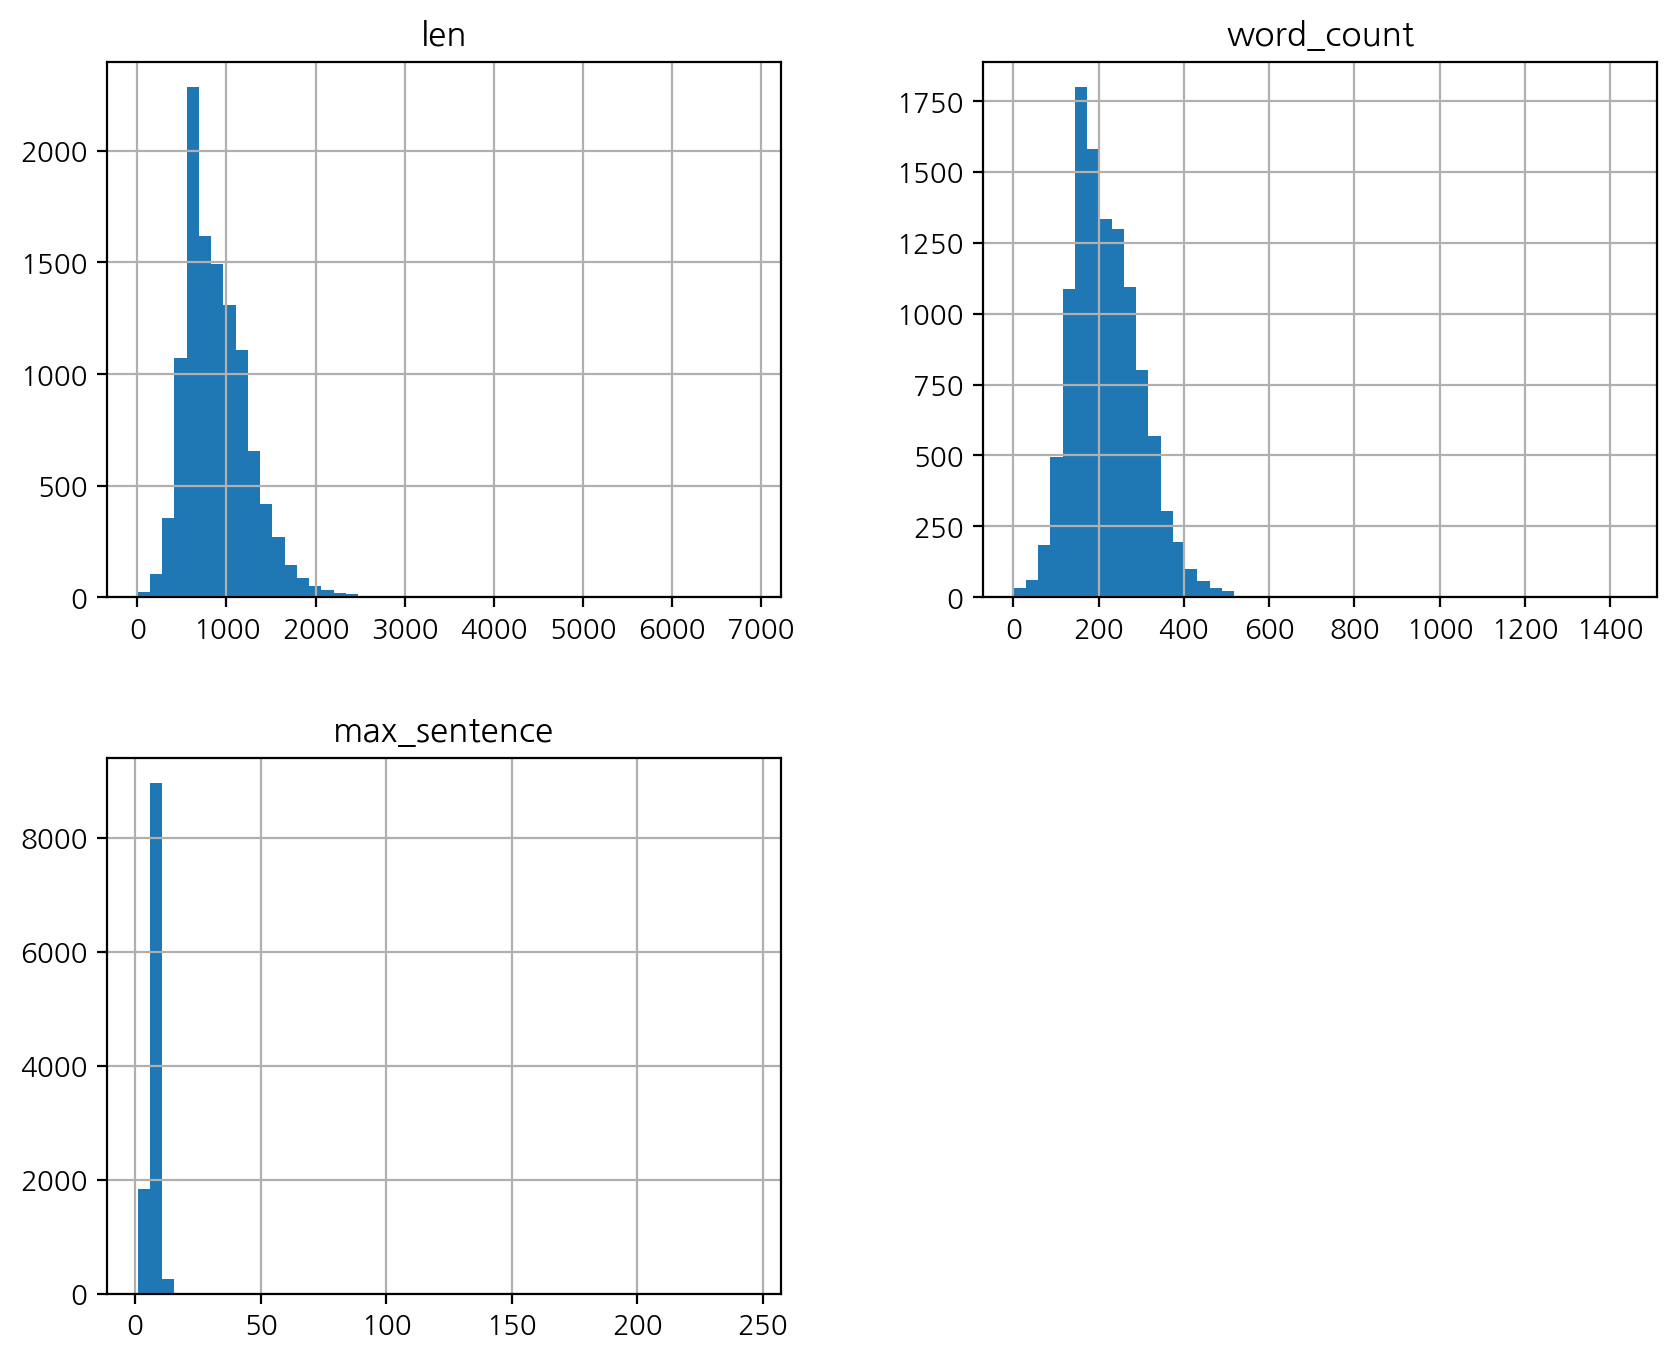

In [23]:
_ = dance.hist(bins=50, figsize=(10,8))

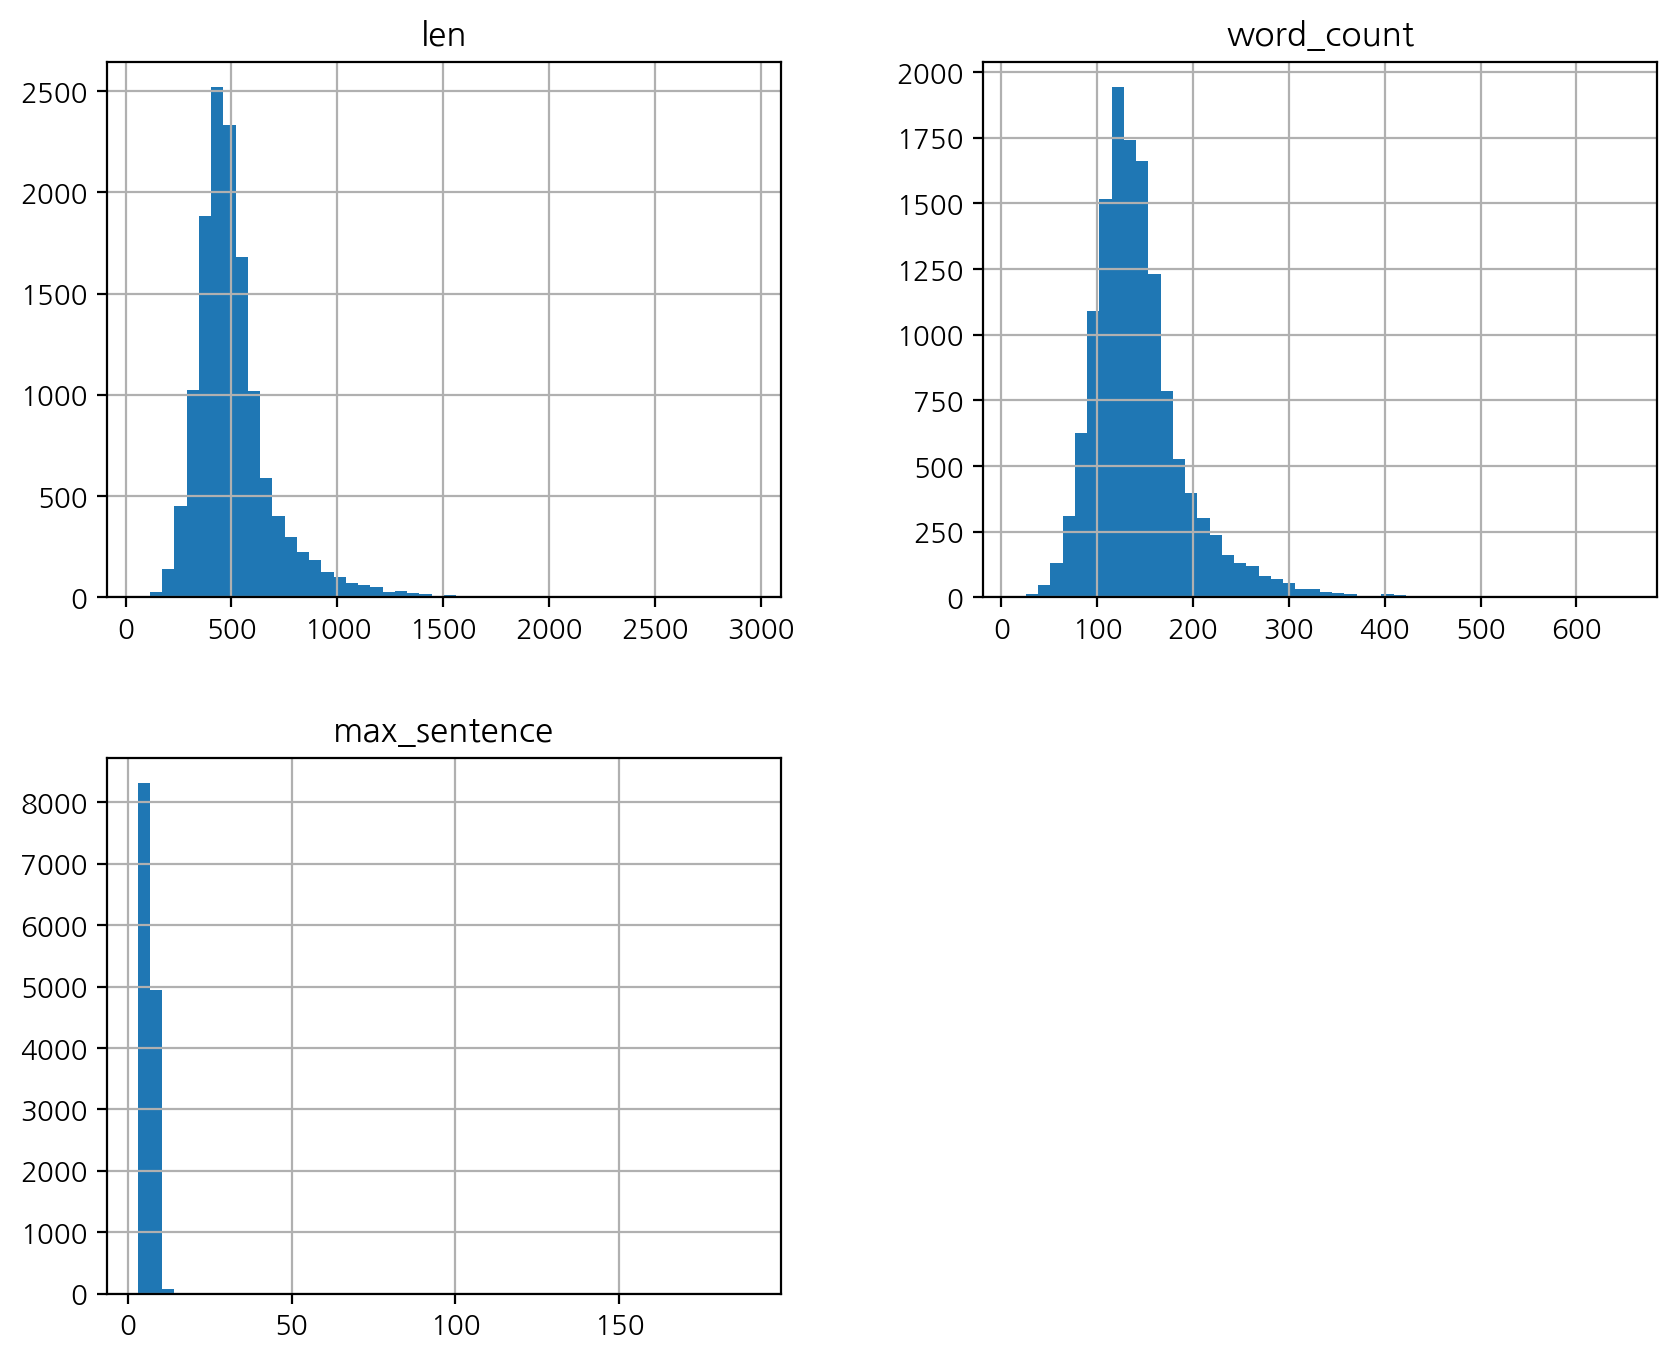

In [24]:
_ = ballad.hist(bins=50, figsize=(10,8))

In [25]:
ballad["max_sentence"].sort_values(ascending=False).nlargest(10)

8527     190
7062     148
3374     109
2541      43
11418     39
7278      34
7580      30
9323      21
1719      18
9149      17
Name: max_sentence, dtype: int64

In [26]:
dance["max_sentence"].sort_values(ascending=False).nlargest(10)

9667     245
9865     238
9861     216
9134     203
9852     195
9287     194
10562     49
9779      30
9555      20
1999      19
Name: max_sentence, dtype: int64

In [27]:
dance[dance["max_sentence"] >= 40].sample(2)

,제목,가사,장르,len,word_count,array,max_sentence
9861,붉은노을,난 너를 사랑해Let's goYes sirWe're back again with 이문세That's rightFresh celebration 2008It's bigbangye ye bust it그댄 아시나요 있잖아요지금 그대가 너무 그리워요고개 숙여 눈물 훔쳐요당신의 이름을 불러요꼭 이렇게 날 남겨두고떠나가야만 했는지너만 생각하면 머리 아퍼독하디 독한 술 같어술 뿐이겠어 병이지매일 앓아누워 몇 번인지내일이면 또 잠깐 잊었다가 또모레쯤이면 생각나겠지만그래도 어떡해아직 내 사랑 유효한데돌아올 거라고 믿는데난 너만 기다리는데난 너를 사랑해Oh I love you girl이 세상은 너 뿐이야소리쳐 부르지만저 대답 없는 노을만 붉게 타는데혹시 그대가 미안해한다면내 얼굴 보기 두렵다면Girl 그런 걱정 하덜덜덜 마너라면 힘이 펄펄펄 나보고 싶은 그대 얼굴저 붉은 노을을 닮아더 슬퍼지는 걸Oh baby baby다 지나간 시간우리가 함께한 추억잊진 말아줘요 눈을 감아소리 없이 날 불러준다면언제라도 달려 갈께요Everyday everynightI need you난 너를 사랑해Oh I love you girl이 세상은 너 뿐이야소리쳐 부르지만저 대답 없는 노을만 붉게 타는데아름다웠던 그대 모습을이젠 볼 순 없겠지만후횐 없어 그저 바라볼 수 있게붉게 타주오Ah Ah Ah Ah Ah Ah Ah AhLet's goAh Ah Ah Ah Ah Ah Ah Ah해가 뜨고 해가 지네노을 빛에 슬퍼지네달이 뜨고 달이 지네세월 속에 나 또한 무뎌지네해가 뜨고 해가 지네노을 빛에 슬퍼지네달이 뜨고 달이 지네그대 기억 또한 무뎌지네난 너를 사랑해Oh I love you girl이 세상은 너 뿐이야소리쳐 부르지만저 대답 없는 노을만 붉게 타는데난 너를 사랑해I love you girl이 세상은 너 뿐이야소리쳐 부르지만저 대답 없는 노을만 붉게 타는데Once againAh Ah Ah Ah Ah Ah Ah AhLet's goAh Ah Ah Ah Ah Ah Ah Ahbig bang,댄스,985,216,"[[난, 너를, 사랑해Let's, goYes, sirWe're, back, again, with, 이문세That's, rightFresh, celebration, 2008It's, bigbangye, ye, bust, it그댄, 아시나요, 있잖아요지금, 그대가, 너무, 그리워요고개, 숙여, 눈물, 훔쳐요당신의, 이름을, 불러요꼭, 이렇게, 날, 남겨두고떠나가야만, 했는지너만, 생각하면, 머리, 아퍼독하디, 독한, 술, 같어술, 뿐이겠어, 병이지매일, 앓아누워, 몇, 번인지내일이면, 또, 잠깐, 잊었다가, 또모레쯤이면, 생각나겠지만그래도, 어떡해아직, 내, 사랑, 유효한데돌아올, 거라고, 믿는데난, 너만, 기다리는데난, 너를, 사랑해Oh, I, love, you, girl이, 세상은, 너, 뿐이야소리쳐, 부르지만저, 대답, 없는, 노을만, 붉게, 타는데혹시, 그대가, 미안해한다면내, 얼굴, 보기, 두렵다면Girl, 그런, 걱정, 하덜덜덜, 마너라면, 힘이, 펄펄펄, 나보고, 싶은, 그대, 얼굴저, 붉은, 노을을, 닮아더, 슬퍼지는, 걸Oh, baby, baby다, 지나간, 시간우리가, 함께한, 추억잊진, 말아줘요, 눈을, 감아소리, 없이, 날, ...]]",216
9287,Abracadabra (아브라카다브라),이러다 미쳐내가 여리여리 착하던 그런 내가너 때문에 돌아내가 독한 나로 변해 내가널 닮은 인형에다주문을 또 걸어 내가그녀와 찢어져 달라고 고every night I feel with youdo you love her do you love her매일 나의 꿈 속에do you love me do you love mebring bring 너를 내게 가져다 줘뭐라도 난 하겠어 더한 것도 하겠어bling bling 도는 나의 fantasy 에모든걸 걸겠어 널 내가 내가 갖겠어못참아 더는내가 이러다가 정신을 놓쳐 내가도대체 왜 너란 애가내 마음에 박혀 니가찢겨진 사진에다주문을 또 걸어 내가그녀가 떨어져 달라고 고every night I feel with youdo you love her do you love her매일 나의 꿈 속에do you love me do you love mebring bring 너를 내게 가져다줘뭐라도 난 하겠어 더한 것도 하겠어bling bling 도는 나의 fantasy에모든걸 걸겠어 널 내가 내가 갖겠어I'm the Boo in the lsland널 되찾기 위한 plan매일같이 이렇게 나눌래널 향한 마지막 step그녀의 손을 잡고그녀와 입을 맞추고그런 너를 상상조차 하기 싫어이 주문에 염원을 실어아브라카다브라 다 이뤄져라Let's go네게 주문을 걸어봐I'm like a supervisor널 통제하는 kaiser내게서 벗어날 수 없어bring bring 너를 내게 가져다줘뭐라도 난 하겠어 더한것도 하겠어bling bling 도는 나의 fantasy에모든걸 걸겠어 널 내가 내가 갖겠어이러다 미쳐 내가여리여리 착하던 그런 내가너 때문에 돌아내가 독한 나로 변해 내가cool한척 하는내가 놀라워 다 이런 내가아닌척 널 만나러 가도 도,댄스,878,194,"[[이러다, 미쳐내가, 여리여리, 착하던, 그런, 내가너, 때문에, 돌아내가, 독한, 나로, 변해, 내가널, 닮은, 인형에다주문을, 또, 걸어, 내가그녀와, 찢어져, 달라고, 고every, night, I, feel, with, youdo, you, love, her, do, you, love, her매일, 나의, 꿈, 속에do, you, love, me, do, you, love, mebring, bring, 너를, 내게, 가져다, 줘뭐라도, 난, 하겠어, 더한, 것도, 하겠어bling, bling, 도는, 나의, fantasy, 에모든걸, 걸겠어, 널, 내가, 내가, 갖겠어못참아, 더는내가, 이러다가, 정신을, 놓쳐, 내가도대체, 왜, 너란, 애가내, 마음에, 박혀, 니가찢겨진, 사진에다주문을, 또, 걸어, 내가그녀가, 떨어져, 달라고, 고every, night, I, feel, with, youdo, you, love, her, do, you, love, her매일, 나의, 꿈, 속에do, you, love, me, do, you, ...]]",194


- 개행문자가 없는경우는 문장을 나누는데 어려움이 있어서 drop 하기로 하자

In [28]:
dance = dance[dance["max_sentence"] < 40]
dance.shape

(11062, 7)

In [29]:
dance["array"].sample(1)

2063    [[왠지, 몰라도, 난, 실없게], [웃는, 게, 좋아, 딱, 이렇게], [I, don’t, know, why], [I, don’t, know, why, yeah], [쪼끄만, 바늘, 같은, 시선에], [무슨, 말, 할까, 괜히, 신중해], [I, don’t, know, why], [I, don’t, know, why, why], [oh-ah, stay, with, me], [길, 잃어도, 문제없지], [한걸음, 한걸음, 뚜벅뚜벅], [한, 걸음, 한, 걸음], [나, 조심스럽게, 산책하듯], [아주, 가볍게, just, walk, away], [walk, away], [walk, away], [walk, away], [I’m, about, to, walk, away], [walk, away], [walk, away], [walk, away], [I, could, just, walk, away, like, that], [Oh, 이, 동네는, 너무, 치열해], [난, 고개, 들어, 마치, 미어캣], [I, don’t, know, why], [I, don’t, know, why, yeah], [행복은, 이런, 게, 절대, 아닌데], [장난, 같은, 너의, 말, 한마디에], [I, think, I, know, why], [I, think, I, know, why, why], [oh-ah, stay, with, me], [찾을, 거야, 문제의, 답안지], [한걸음, 한걸음, 뚜벅뚜벅], [한, 걸음, 한, 걸음], [나, 자연스럽게, 산책하듯], [당당하게, just, walk, away], [walk, away], [walk, away], [walk, away], [I’m, about, to, walk, away], [walk, away], [walk, away], [walk, away], [I, could, just], [도착한, 곳이, 제자리, 이래도], [괜찮아, 배웠으니까], [똑같은, 실수는, 안된대], [아냐], [열, 번이고, 틀려도, 돼

In [30]:
def remove_enter(df):
    df["가사개행제거"] = df["가사"].map(lambda x: (" ".join(x.split("\n")).strip()))

remove_enter(ballad)
ballad.sample(2)

,제목,가사,가수,발매일,좋아요수,장르,len,word_count,array,max_sentence,가사개행제거
12439,COLOR,한 손엔 그대 손을 꼭 쥐고서 걷고\n마음은 설레임 속에 깊어져 가요\noh 난 그대를 바라볼 때 웃음이 나고\noh 난 그대의 미소가 좋아\n또 어쩔 줄 몰라하는 그대 모습이\n난 너무나 좋은걸\n사람은 사랑할때 아름다워요\n그래서 그댄 더 아름다운 가봐요\n내 마음 그대에게 물들어 가요\nMy color is you\nMy color is you\n내 앞엔 손을 꼭 잡은 연인이 있고\n그들도 설레임 속에 깊어져 가요\noh 날 보는 그대에게 사랑을 느꼈고\noh 난 그 눈이 아직 선명해\n또 어쩔 줄 몰라하는 그대 모습이\n난 너무나 좋은걸\n사람은 사랑할때 아름다워요\n그래서 그댄 더 아름다운 가봐요\n내 마음 그대에게 물들어 가요\nMy color is you\nMy color is you\n소중한 그대에게 말해줄게요\nMy color is you\nMy color is you,유지우,2022.04.27,603,발라드,420,119,"[[한, 손엔, 그대, 손을, 꼭, 쥐고서, 걷고], [마음은, 설레임, 속에, 깊어져, 가요], [oh, 난, 그대를, 바라볼, 때, 웃음이, 나고], [oh, 난, 그대의, 미소가, 좋아], [또, 어쩔, 줄, 몰라하는, 그대, 모습이], [난, 너무나, 좋은걸], [사람은, 사랑할때, 아름다워요], [그래서, 그댄, 더, 아름다운, 가봐요], [내, 마음, 그대에게, 물들어, 가요], [My, color, is, you], [My, color, is, you], [내, 앞엔, 손을, 꼭, 잡은, 연인이, 있고], [그들도, 설레임, 속에, 깊어져, 가요], [oh, 날, 보는, 그대에게, 사랑을, 느꼈고], [oh, 난, 그, 눈이, 아직, 선명해], [또, 어쩔, 줄, 몰라하는, 그대, 모습이], [난, 너무나, 좋은걸], [사람은, 사랑할때, 아름다워요], [그래서, 그댄, 더, 아름다운, 가봐요], [내, 마음, 그대에게, 물들어, 가요], [My, color, is, you], [My, color, is, you], [소중한, 그대에게, 말해줄게요], [My, color, is, you], [My, color, is, you]]",7,한 손엔 그대 손을 꼭 쥐고서 걷고 마음은 설레임 속에 깊어져 가요 oh 난 그대를 바라볼 때 웃음이 나고 oh 난 그대의 미소가 좋아 또 어쩔 줄 몰라하는 그대 모습이 난 너무나 좋은걸 사람은 사랑할때 아름다워요 그래서 그댄 더 아름다운 가봐요 내 마음 그대에게 물들어 가요 My color is you My color is you 내 앞엔 손을 꼭 잡은 연인이 있고 그들도 설레임 속에 깊어져 가요 oh 날 보는 그대에게 사랑을 느꼈고 oh 난 그 눈이 아직 선명해 또 어쩔 줄 몰라하는 그대 모습이 난 너무나 좋은걸 사람은 사랑할때 아름다워요 그래서 그댄 더 아름다운 가봐요 내 마음 그대에게 물들어 가요 My color is you My color is you 소중한 그대에게 말해줄게요 My color is you My color is you
6310,무슨 사랑이 그래요,항상 이런 식인가요\n여자를 만날 때마다\n왜 그렇게 설레도록 잘해준건가요\n책임지지도 못할 걸\n내가 그리 쉽게 보였었나요\n왜 그랬어요\n\n바보야 나같은 걸 왜 사랑해\n볼 게 뭐가 있니\n해준 게 뭐가 있니\n너만 힘들어질 뿐이야\n이거 봐 지금도 널 울리잖아\n누굴 사랑할 자격도 난 없는 것 같아\n무슨 남자가 그래요\n한 입으로 두 말 왜 해요\n죽을만큼 나를 사랑한다면서요\n무슨 사랑이 그래요\n상처만을 주고 떠나가나요\n정말 나빠요\n그래 돌아서자마자\n내가 무너질 거 맞아\n왜 눈물이 나지\n나 어떻게 살지\n후 죽을 것 같다\n아냐 며칠이면 괜찮겠지\n너도 빨리 날 잊고\n좋은 남자 만나\n무슨 남자가 그래요\n한입으로 두 말 왜 해요\n죽을 만큼 나를 사랑한다면서요\n무슨 사랑이 그래요\n상처만을 주고 떠나가나요\n정말 나빠요\n제발 보낼 때 떠나가란 말야\n나를 보지 마\n네 눈물 보면 마음 약해지니까\n사랑하긴 했나요\n한 번만 듣고 싶어요\n나는 아직 사랑하는데\n나를 울려도 좋아요\n나쁜 남자래도 좋아요\n그대 곁에 있을 수만 있게 해줘요\n미워도 보고 싶은걸\n미치도록 좋은걸 어떡해요\n가지 말아요,백찬,2008.11.06,"3,588",발라드,538,155,"[[항상, 이런, 식인가요], [여자를, 만날, 때마다], [왜, 그렇게, 설레도록, 잘해준건가요], [책임지지도, 못할, 걸], [내가, 그리, 쉽게, 보였었나요], [왜, 그랬어요], [], [바보야, 나같은, 걸, 왜, 사랑해], [볼, 게, 뭐가, 있니], [해준, 게, 뭐가, 있니], [너만, 힘들어질, 뿐이야], [이거, 봐, 지금도, 널, 울리잖아], [누굴, 사랑할, 자격도, 난, 없는, 것, 같아], [무슨, 남자가, 그래요], [한, 입으로, 두, 말, 왜, 해요], [죽을만큼, 나를, 사랑한다면서요], [무슨, 사랑이, 그래요], [상처만을, 주고, 떠나가나요], [정말, 나빠요], [그래, 돌아서자마자], [내가, 무너질, 거, 맞아], [왜, 눈물이, 나지], [나, 어떻게, 살지], [후, 죽을, 것, 같다], [아냐, 며칠이면, 괜찮겠지], [너도, 빨리, 날, 잊고], [좋은, 남자, 만나], [무슨, 남자가, 그래요], [한입으로, 두, 말, 왜, 해요], [죽을, 만큼, 나를, 사랑한다면서요], [무슨, 사랑이, 그래요], [상처만을, 주고, 떠나가나요], [정말, 나빠요], [제발, 보낼, 때, 떠나가란, 말야], [나를, 보지, 마], [네, 눈물, 보면, 마음, 약해지니까], [사랑하긴, 했나요], [한, 번만, 듣고, 싶어요], [나는, 아직, 사랑하는데], [나를, 울려도, 좋아요], [나쁜, 남자래도, 좋아요], [그대, 곁에, 있을, 수만, 있게, 해줘요], [미워도, 보고, 싶은걸], [미치도록, 좋은걸, 어떡해요], [가지, 말아요]]",7,항상 이런 식인가요 여자를 만날 때마다 왜 그렇게 설레도록 잘해준건가요 책임지지도 못할 걸 내가 그리 쉽게 보였었나요 왜 그랬어요 바보야 나같은 걸 왜 사랑해 볼 게 뭐가 있니 해준 게 뭐가 있니 너만 힘들어질 뿐이야 이거 봐 지금도 널 울리잖아 누굴 사랑할 자격도 난 없는 것 같아 무슨 남자가 그래요 한 입으로 두 말 왜 해요 죽을만큼 나를 사랑한다면서요 무슨 사랑이 그래요 상처만을 주고 떠나가나요 정말 나빠요 그래 돌아서자마자 내가 무너질 거 맞아 왜 눈물이 나지 나 어떻게 살지 후 죽을 것 같다 아냐 며칠이면 괜찮겠지 너도 빨리 날 잊고 좋은 남자 만나 무슨 남자가 그래요 한입으로 두 말 왜 해요 죽을 만큼 나를 사랑한다면서요 무슨 사랑이 그래요 상처만을 주고 떠나가나요 정말 나빠요 제발 보낼 때 떠나가란 말야 나를 보지 마 네 눈물 보면 마음 약해지니까 사랑하긴 했나요 한 번만 듣고 싶어요 나는 아직 사랑하는데 나를 울려도 좋아요 나쁜 남자래도 좋아요 그대 곁에 있을 수만 있게 해줘요 미워도 보고 싶은걸 미치도록 좋은걸 어떡해요 가지 말아요


In [31]:
dance["가사개행제거"] = dance["가사"].map(lambda x: (" ".join(x.split("\r\n")).strip()))
dance["가사개행제거"].sample(1)

6424    아 대체 몇 신데 지금 밥도 안 주고 뭐 하는 거야 아 느려 터져가지고 말이야 지금 아이 밥 안 줄 거야 아 배고파 진짜 아 여보 밥 줘 우리 남편 삼식이 때문에 난 매일 꼭지가 돌아 우리 아들 7년째 놀아 돈 들어 꼭지가 돌아 우리 딸은 시집을 못 가 늙어서 꼭지가 돌아 내 뚜껑 자꾸 열리면 수미 골짜기 가겠다 우리 엄마가 항상 부엌에 서 있어 언제나 나의 밥을 챙겨 주려고 또 서 있어 우리 여보가 항상 여기 서 있었어 나는 언제나 먹기만 했어 이제 그만 쉬어요 압력밥솥처럼 쉬지 않고서 끓고 있는 것이 엄마들의 삶이지만 자꾸 끓다 보면 꼭지가 돌아 꼭지가 돌다 돌다 돌다 결국 나는 터져 버리겠어 아 아직 밥 안 됐어 아 빨리 밥 좀 줘 밥 줘 밥 먹어라 이 밥통들아 우야 밥 밥 퍼 우야 밥 밥 퍼 우야 밥 밥 퍼 밥 먹어라 이 밥통들아 우야 밥 밥 퍼 우야 밥 밥 퍼 우야 밥 밥 퍼 Put your hands up 돌아 돌아 도도도도도 돌아 돌아 돌아 도도도도도 돌아 돌아 도도도도도 돌아 돌아 돌아 Put your hands up 아 빨리 밥 좀 줘 아 아직 밥 안 됐어 아이 밥 안 주고 뭐 해 지금 아 배고파 진짜 밥 줘 우리 남편 삼식이 때문에 난 매일 꼭지가 돌아 우리 아들 7년 째 놀아 돈 들어 꼭지가 돌아 우리 딸은 시집을 못 가 늙어서 꼭지가 돌아 내 뚜껑 자꾸 열리면 수미 골짜기 가겠다 우리 아빠가 매일 아무것도 안 하고 언제나 엄마한테 이것저것 해 달라 하고 우리 누나가 항상 늦게 들어와서 엄만 언제나 걱정만 했어 이제 그만 쉬어요 압력밥솥처럼 쉬지 않고서 끓고 있는 것이 엄마들의 삶이지만 자꾸 끓다 보면 꼭지가 돌아 꼭지가 돌다 돌다 돌다 결국 나는 터져 버리겠어 아 대체 몇 신데 지금 밥도 안 주고 뭐 하는 거야 아 여보 밥 줘 밥 먹어라 이 밥통들아 우야 밥 밥 퍼 우야 밥 밥 퍼 우야 밥 밥 퍼 밥 먹어라 이 밥통들아 우야 밥 밥 퍼 우야 밥 밥 퍼 우야 밥 밥 퍼 Put your hands up 돌아 돌아 도도도도도 돌아

### 가사에 한글이 아닌 비중이 어느정도 인지 파악해보자
- 영어비중 파악하기
- 숫자 비중 파악하기
- 영어 숫자 한글 비율을 시각화 해보기

In [32]:
# 테스트
word="happy로"
english = re.compile(r'^[a-zA-Z]*$')
if english.match(word):
    print("It is an alphabet")
else:
    print("It is not an alphabet")
    
word="ㅋㅋ"
korean = re.compile(r'[가-힣]')
if korean.match(word):
    print("It is an 한글")
else:
    print("It is not an 한글")


number = re.compile(r'[0-9]')
word="123"
if word.isdigit():
    print("It is an 숫자")
else:
    print("It is not an 숫자")


It is not an alphabet
It is not an 한글
It is an 숫자


In [33]:
english = re.compile(r'[a-zA-Z]')
korean = re.compile(r'[가-힣]')
number = re.compile(r'[0-9]')

def check_word_kind(dancd_lyrics):
    eng = 0
    kor = 0
    num = 0
    etc = 0
    
    for word in dancd_lyrics:
        if korean.match(word):
            kor += 1
        elif english.match(word):
            eng += 1
        elif word.isdigit():
            num += 1    
        else:
            etc += 1

    return [kor, eng, num, etc]

check_word_kind(["adfg", "한글", "123", "*", "happy한"]) # 한글, 영어, 숫자, 기타 순

        

[1, 2, 1, 1]

In [34]:
ballad["가사의단어들"] = ballad["가사개행제거"].map(lambda x : x.split())
ballad["가사의단어들"].sample(1)

9490    [어느, 날, 갑자기, 내, 하루에, 네가, 나타나, 맘을, 헝클이네, 시도, 때도, 없이, 설레어, 믿을, 수, 없어, 난, 뭐, 이리, 쉽게, 가슴이, 뛰어, 사랑은, 이렇게, 예고가, 없나봐, i, love, you, 이, 말을, 건내려, 해, 솔직히, 아닌, 척, 숨기기엔, 내, 맘이, 너무, 커졌어, 사랑해, 이, 마음, 전할게, 받아주겠니, 조금씩, 다가갈게, 이, 설레임이, 좋아, 확실한게, 있어, 어제보다, 더, 좋아, 이, 맘, 사랑말곤, 설명이, 안돼, i, love, you, 이, 말을, 건내려, 해, 솔직히, 아닌, 척, 숨기기엔, 내, 맘이, 너무, 커졌어, 사랑해, 이, 마음, 전할게, 받아주겠니, 조금씩, 다가갈게, 이, 설레임이, 좋아, 준비, 없이, 만난, 비처럼, 그렇게, 내게, 다가온, 너, 이, 맘, 마를, 새, 없게, 자꾸, ...]
Name: 가사의단어들, dtype: object

In [35]:
dance["가사의단어들"] = dance["가사개행제거"].map(lambda x : x.split())
dance["가사의단어들"].sample(1)

11061    [Touch, TouTouch, Touch, TouTouch, Tou, Tou, Tou, Tou, Tou, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, me, Touch, Touch, Touch, Touch, Touch, Touch, Feel, me, Touch, Touch, Touch, Touch, Touch, Touch, Feelelelelel, me, 넌, 아마, 내가, 쉬운, 여자라, 알겠지, 필요할때, 만나고, 아니면, 아니야, 몇번에, 전화에, 넌, 내게, 반응하니, 한번이면, 되잖니, 난, 느낄, 수, 있어, You, 아마, 난, 네게, 흔적뿐, I, need, 네가, 필요해, 다가와, Touch, me, yah, Baby, Cause, be, a, Baby, Touch, me, yah, Baby, ...]
Name: 가사의단어들, dtype: object

In [36]:
temp = dance["가사의단어들"].sample(1).tolist()
temp = temp[0]
temp

['OH',
 'OH',
 'OH',
 'MA',
 'MA',
 'MA',
 '어우워우',
 '어',
 '어',
 '우워우',
 'OH',
 'OH',
 'OH',
 'MA',
 'MA',
 'MA',
 '어우워우',
 '어',
 '어',
 '우워우',
 '여자',
 '맘을',
 '몰라',
 '넌',
 '몰라',
 '꼭',
 '말해줘야',
 '너는',
 '아니',
 '아니',
 '오빤',
 '정말',
 '이래서',
 '안돼',
 '뭘',
 '잘못했는지도',
 '몰라',
 '몰라',
 '맨날',
 '미안하단말',
 '맨날',
 '사랑한단말',
 '이제',
 '더는',
 '못믿겠어',
 'NO',
 'NO',
 '맨날',
 '노력한다고',
 '맨날',
 '잘하겠다고',
 '내맘하나',
 '몰라주니',
 'OH',
 'MY',
 'GOD',
 'OH',
 'MY',
 'GOD',
 'OH',
 'MY',
 'GOD',
 'GOD',
 '정말',
 '눈치코치',
 '하나없어',
 '없어',
 '아',
 '정말',
 '아',
 '정말',
 '정말',
 '정말',
 '너무',
 '답답해서',
 '미치겠어',
 '겠어',
 'OH',
 'OH',
 'OH',
 'MA',
 'MA',
 'MA',
 '어우워우',
 '어',
 '어',
 '우워우',
 'OH',
 'OH',
 'OH',
 'MA',
 'MA',
 'MA',
 '어우워우',
 '어',
 '어',
 '우워우',
 '남잔',
 '하나같이',
 '똑같애',
 '하난',
 '알고',
 '둘은',
 '몰라',
 '몰라',
 '화장하고',
 '머릴',
 '바꿔도',
 '그것조차',
 '너는',
 '몰라',
 '몰라',
 '맨날',
 '미안하단말',
 '맨날',
 '사랑한단말',
 '이제',
 '더는',
 '못믿겠어',
 'NO',
 'NO',
 '맨날',
 '노력한다고',
 '맨날',
 '잘하겠다고',
 '내맘하나',
 '몰라주니',
 'OH',
 'MY',
 'GOD',
 'OH',
 'MY',
 'GOD',
 'OH'

In [37]:
check_word_kind(temp)

[133, 85, 0, 0]

In [38]:
def word_kind_count(df):
    kor_eng_num_etc = pd.DataFrame(df["가사의단어들"].map(check_word_kind))
    df["한글단어수"] = kor_eng_num_etc["가사의단어들"].str[0]
    df["영어단어수"] = kor_eng_num_etc["가사의단어들"].str[1]
    df["숫자단어수"] = kor_eng_num_etc["가사의단어들"].str[2]
    df["기타단어수"] = kor_eng_num_etc["가사의단어들"].str[3]

In [39]:
word_kind_count(ballad)

In [40]:
kor_eng_etc = pd.DataFrame(dance["가사의단어들"].map(check_word_kind))
kor_eng_etc

,가사의단어들
0,"[181, 279, 0, 6]"
1,"[116, 90, 0, 0]"
2,"[189, 12, 0, 7]"
3,"[83, 164, 0, 12]"
4,"[0, 292, 0, 12]"
...,...
11064,"[154, 0, 0, 0]"
11065,"[107, 0, 0, 0]"
11066,"[66, 0, 0, 0]"
11067,"[88, 8, 0, 0]"


In [41]:
dance["한글단어수"] = kor_eng_etc["가사의단어들"].str[0]
dance["영어단어수"] = kor_eng_etc["가사의단어들"].str[1]
dance["숫자단어수"] = kor_eng_etc["가사의단어들"].str[2]
dance["기타단어수"] = kor_eng_etc["가사의단어들"].str[3]

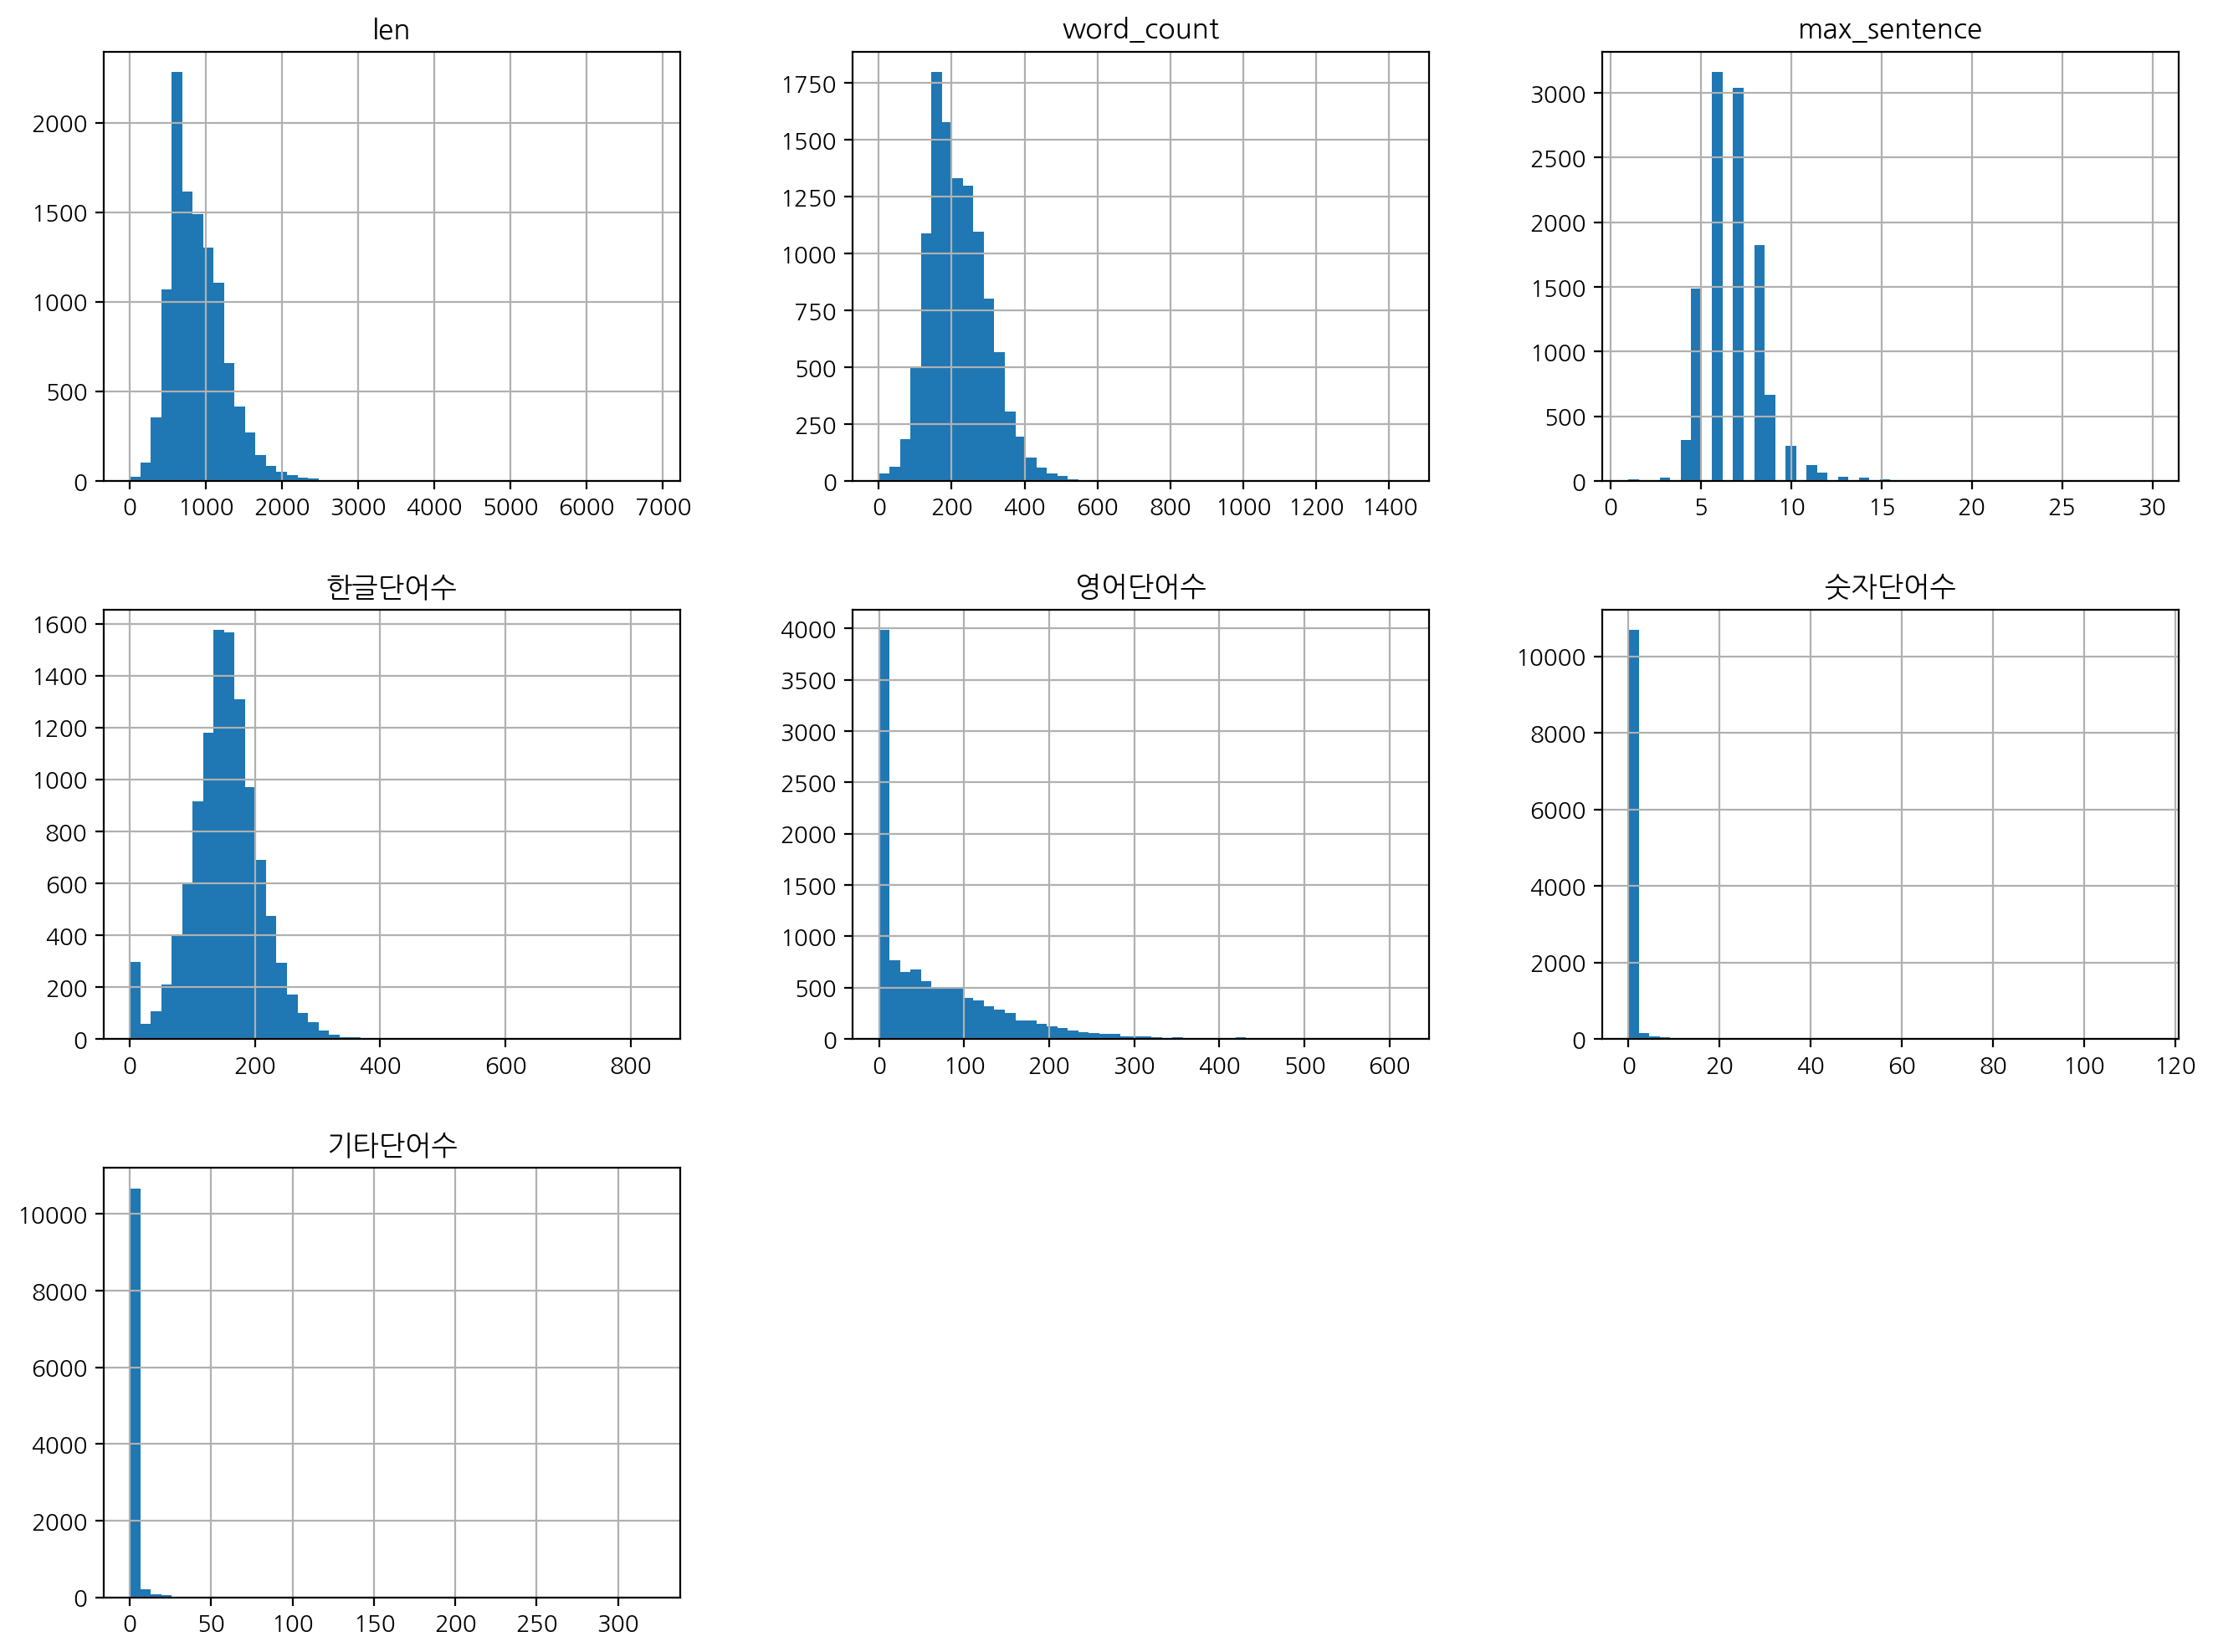

In [42]:
_ = dance.hist(figsize=(16,12), bins=50)

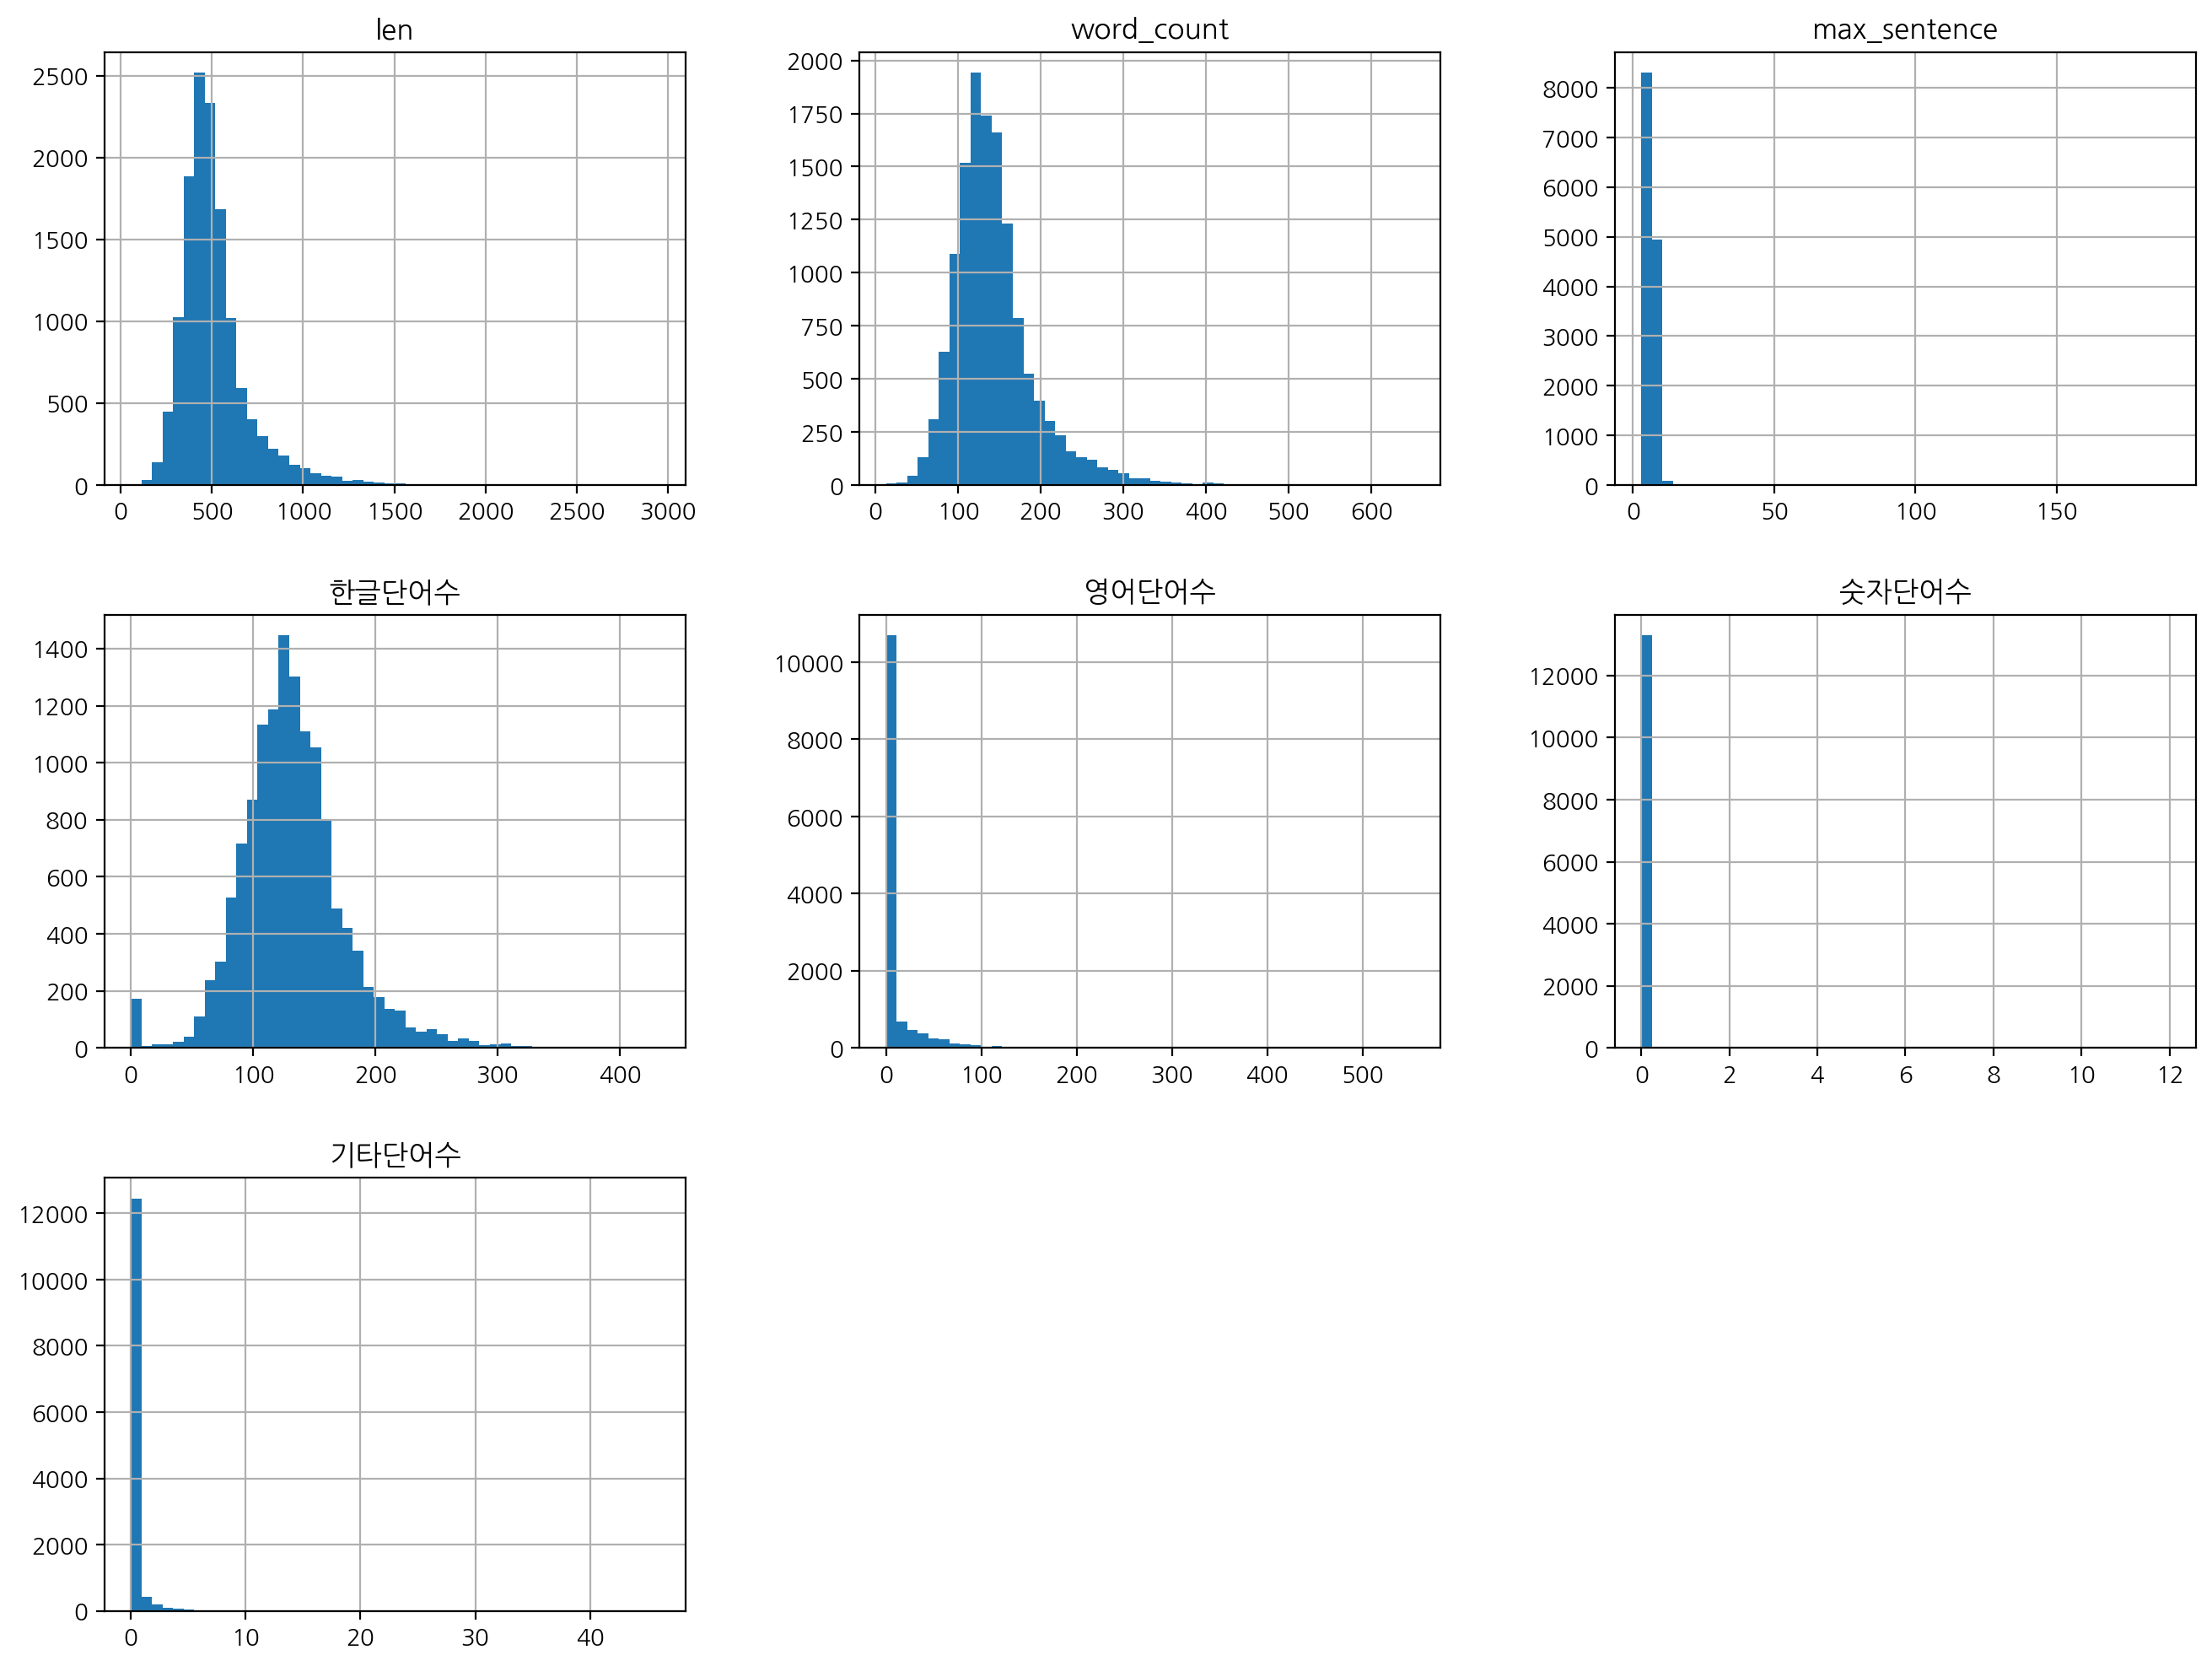

In [43]:
_ = ballad.hist(figsize=(16,12), bins=50)

### 영어단어수 비교해보기

Text(0.5, 1.0, '발라드')

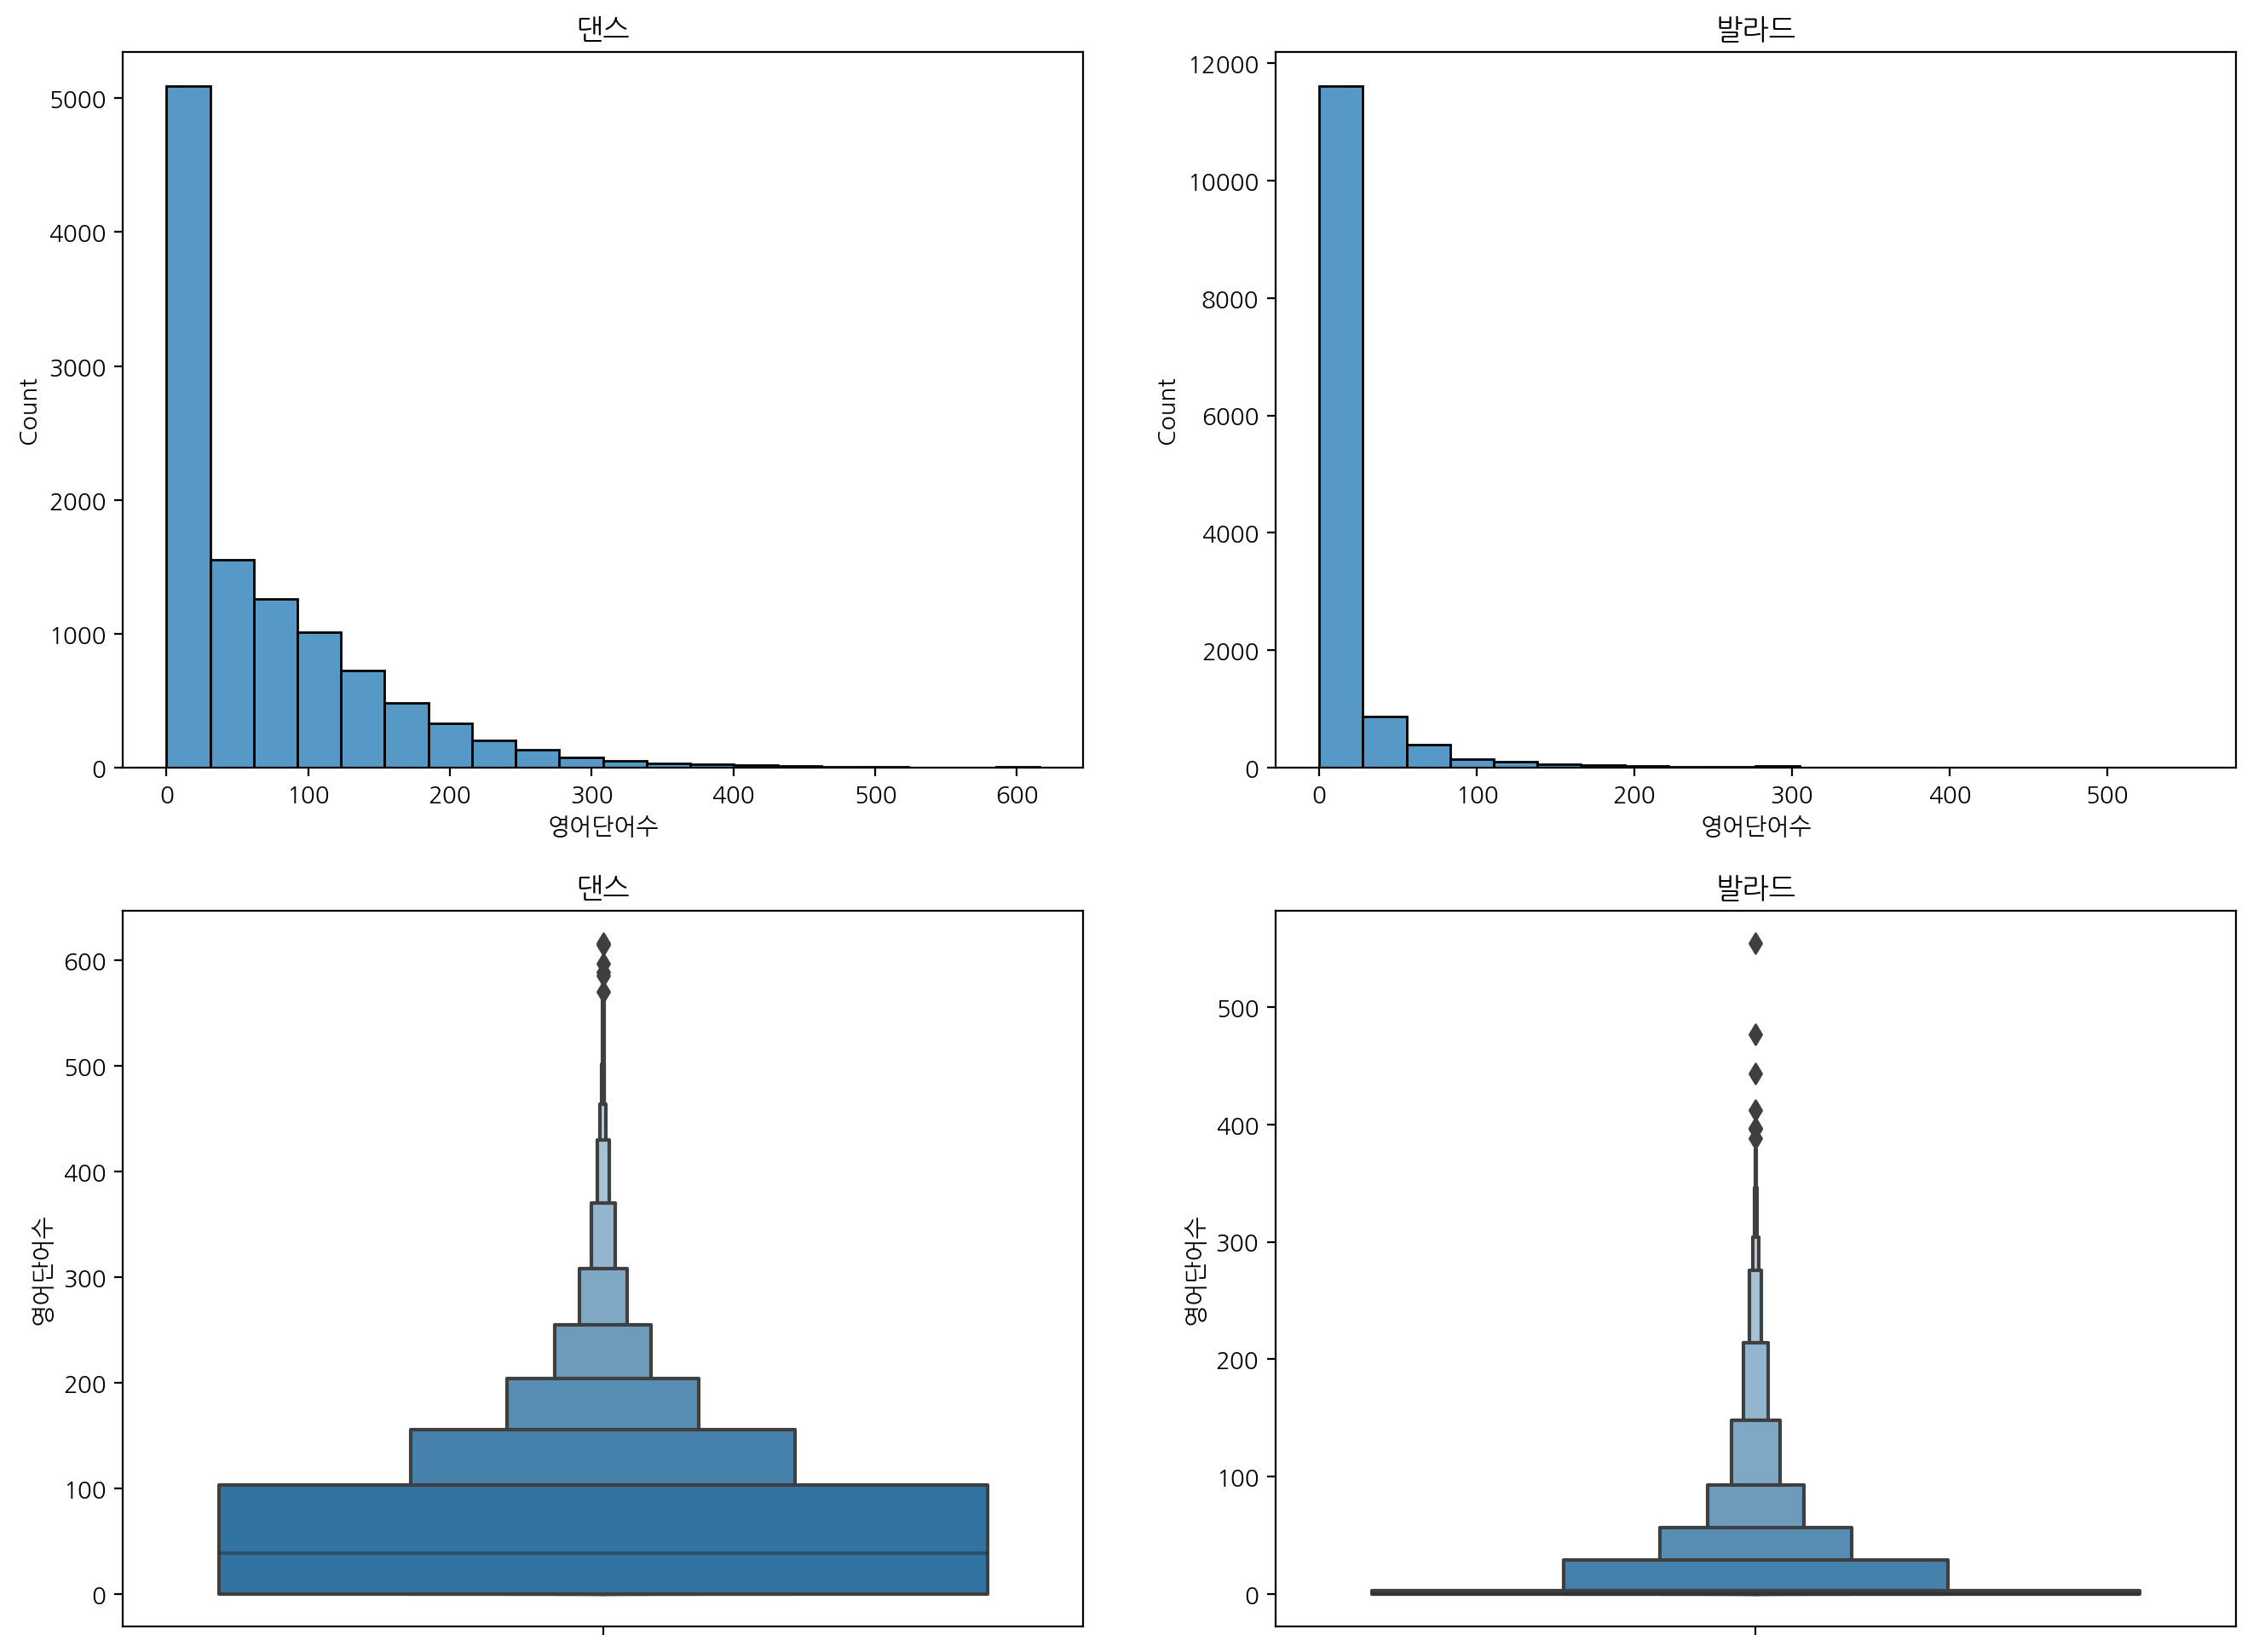

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(data=dance, x="영어단어수", bins=20, ax=axes[0][0]).set_title("댄스")
sns.histplot(data=ballad, x="영어단어수", bins=20, ax=axes[0][1]).set_title("발라드")
sns.boxenplot(data=dance, y="영어단어수", ax=axes[1][0]).set_title("댄스")
sns.boxenplot(data=ballad, y="영어단어수", ax=axes[1][1]).set_title("발라드")

Text(0.5, 1.0, '발라드')

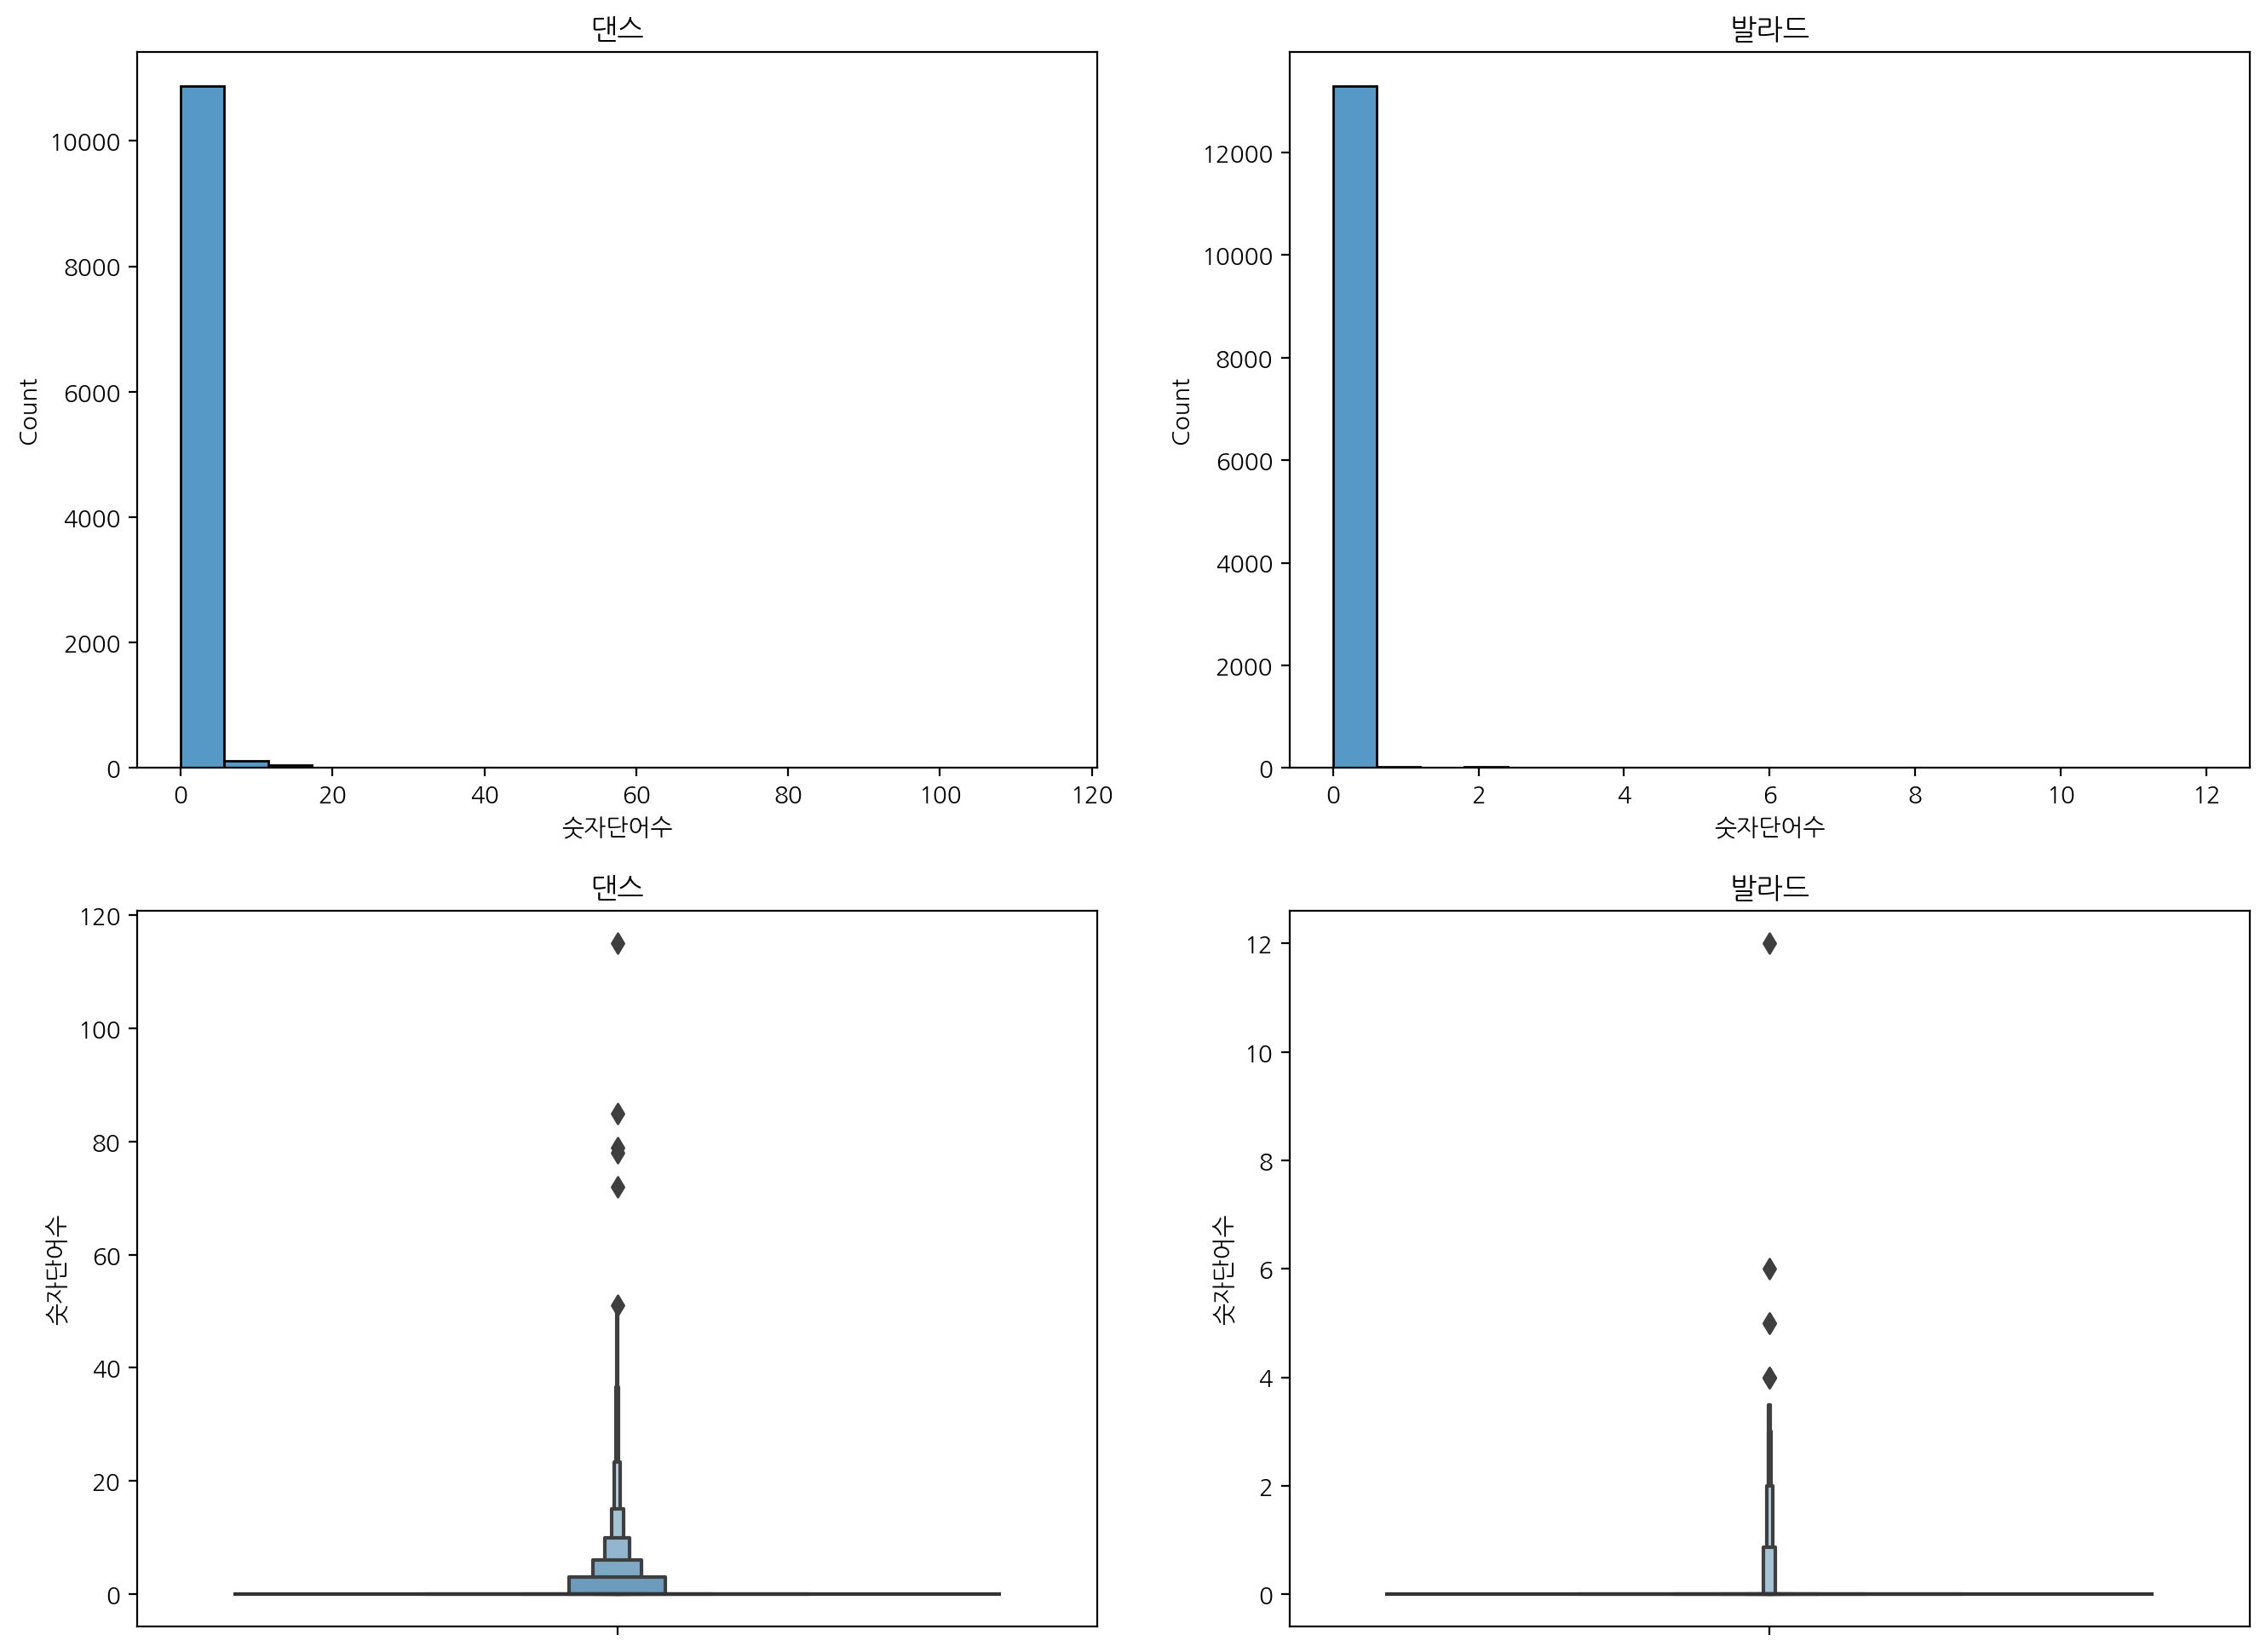

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(data=dance, x="숫자단어수", bins=20, ax=axes[0][0]).set_title("댄스")
sns.histplot(data=ballad, x="숫자단어수", bins=20, ax=axes[0][1]).set_title("발라드")
sns.boxenplot(data=dance, y="숫자단어수", ax=axes[1][0]).set_title("댄스")
sns.boxenplot(data=ballad, y="숫자단어수", ax=axes[1][1]).set_title("발라드")

In [46]:
dance.columns

Index(['제목', '가사', '장르', 'len', 'word_count', 'array', 'max_sentence',
       '가사개행제거', '가사의단어들', '한글단어수', '영어단어수', '숫자단어수', '기타단어수'],
      dtype='object')

In [47]:
dance[['한글단어수', '영어단어수', '기타단어수', '숫자단어수']].describe()

,한글단어수,영어단어수,기타단어수,숫자단어수
count,11062.000000,11062.000000,11062.000000,11062.000000
mean,152.019617,65.818026,0.905080,0.331314
std,56.713820,79.658768,5.557211,2.663151
min,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.000000,0.000000,0.000000
50%,153.000000,39.000000,0.000000,0.000000
75%,185.000000,103.000000,0.000000,0.000000
max,837.000000,616.000000,322.000000,115.000000


In [48]:
ballad[['한글단어수', '영어단어수', '기타단어수', '숫자단어수']].describe()

,한글단어수,영어단어수,기타단어수,숫자단어수
count,13346.000000,13346.000000,13346.000000,13346.000000
mean,131.664469,12.019257,0.188970,0.008617
std,42.968509,35.731623,1.157814,0.178669
min,0.000000,0.000000,0.000000,0.000000
25%,106.000000,0.000000,0.000000,0.000000
50%,129.000000,0.000000,0.000000,0.000000
75%,153.000000,3.000000,0.000000,0.000000
max,432.000000,554.000000,46.000000,12.000000


In [49]:
# 한글이 아닌 단어의 비율
dance["한글아닌단어비율"] = (dance['영어단어수'] + dance['기타단어수'] + dance['숫자단어수']) / dance["word_count"] * 100
dance["한글아닌단어비율"][:10]

0     61.158798
1     43.689320
2      9.134615
3     67.953668
4    100.000000
5     40.692641
6     49.327354
7      8.256881
8      0.000000
9     58.131488
Name: 한글아닌단어비율, dtype: float64

In [50]:
ballad["한글아닌단어비율"] = (ballad['영어단어수'] + ballad['기타단어수'] + ballad['숫자단어수']) / ballad["word_count"] * 100
ballad["한글아닌단어비율"][:10]

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    7.392996
Name: 한글아닌단어비율, dtype: float64

In [51]:
dance[dance["한글아닌단어비율"] > 30][['가사개행제거','한글단어수', '영어단어수', '기타단어수', '숫자단어수', '한글아닌단어비율']].sample(2)

,가사개행제거,한글단어수,영어단어수,기타단어수,숫자단어수,한글아닌단어비율
7119,How did this all happen to us I don’t know if we can fix this I just can’t feel the sweet connection anymore Is this how it’s meant to be I still can’t really understand this It’s confusing me I don’t know what to do Sugar Free No I’m not saying it’s not true baby I’ll be missing you I’m just missing Your smile and everything you did for me Now maybe it’s all gone But I gave you everything 네 말투 표정까지 하나 하나 하나 하나 다 Hey Sugar Free Now you are Sugar Free Just to me Sugar Free Everything’s Sugar Free Why do you drag me down so much Can’t take this no more please go away 날 만들어버렸어 뭔가 빠져버린 슈가프리 What is your plan now Escalating moving faster I can’t think straight At the start it was sweet but not too bitter I can bear Can’t keep up with your pace no more I still love you but you don’t slow It’s confusing me I don’t know what to do Sugar Free No I’m not saying it’s not true baby I’ll be missing you I’m just missing Your smile and everything you did for me Now maybe it’s all gone But I gave you everything 네 말투 표정까지 하나 하나 하나 하나 다 Hey Sugar Free Now you are Sugar Free Just to me Sugar Free Everything’s Sugar Free Why do you keep going on and on Can’t bear this Please stop breaking my heart 이렇게 아프게만 해 달콤함을 잃어버린 Hey Sugar Free Now you are Sugar Free Just to me Sugar Free Everything’s Sugar Free Why do you drag me down so much I can’t take this no more please go away 날 만들어버렸어 뭔가 빠져버린 Sugar Free,30,264,0,0,89.795918
6571,hey yo what up dog grab da microphone turn da music on cuz we r gonna make u hot and c'mon 나를 너의 품으로 입술은 너의 kiss로 나 너를 사랑한다고 헤이헤이헤이헤이 1 2 step 내게 다가와 오늘밤 나를 가져봐 그대 환상에 취하네 헤이헤이헤이헤이 나 오늘밤은 화끈하게 ho 두손을 들어 dirty dirty 조우 yeah 흥분되는 너의 몸짓도 사랑하는 너의 팔과 다리도 yes say yes 나 좀 더 빠르게 너와 함께 나 즐길래 미치게 흥분되는 조명아래에 내 눈빛은 bling bling해 DANNY 헤이 뜨겁게 뛰어볼래 사랑해 너를 원해 오늘밤 오와 오아 시작해 DANNY 헤이 뜨겁게 뛰어볼래 사랑해 너를 원해 오늘밤 오와 오아 시작해 나는 환상에 취해 너와 하나가 되네 나를 너의 품으로 입술은 너의 kiss로 나 너를 사랑한다고 헤이헤이헤이헤이 1 2 step 내게 다가와 오늘밤 나를 가져봐 그대 환상에 취하네 헤이헤이헤이헤이 hey yo ladies and gentleman this song is dedicated 4 party people listen 2 da beat listen 2 da groove pumpin' pumpin' enjoy u r girl 2nite 내 손을 잡아 that's ma flow 날 쳐다보는 너의 눈빛도 이밤을 즐겨 party party ho 미치게 흥분되는 너의 가슴도 yes say yes 너를 사랑해 이밤도 너와 pumpin'해 클럽에선 chilin' chilin'해 오늘밤 darlin' darlin'돼 DANNY 헤이 뜨겁게 뛰어볼래 사랑해 너를 원해 오늘밤 오와 오아 시작해 DANNY 헤이 뜨겁게 뛰어볼래 사랑해 너를 원해 오늘밤 오와 오아 시작해 나는 환상에 취해 너와 하나가 되네 나를 너의 품으로 입술은 너의 kiss로 나 너를 사랑한다고 헤이헤이헤이헤이 1 2 step 내게 다가와 오늘밤 나를 가져봐 그대 환상에 취하네 헤이헤이헤이헤이 두손은 너의 허리로 입술은 나의 kiss로 나 너를 사랑한다고 헤이 헤이 헤이 헤이 1 2 step 내게 다가와 사랑을 내게 말해봐 오늘의 일을 시작해 헤이 헤이 헤이 헤이 두손은 너의 허리로 입술은 나의 kiss로 나 너를 사랑한다고 헤이 헤이 헤이 헤이 1 2 step 내게 다가와 사랑을 내게 말해봐 오늘의 일을 시작해 헤이 헤이 헤이 헤이 a.k.a DANNY turn this on,199,86,1,13,33.444816


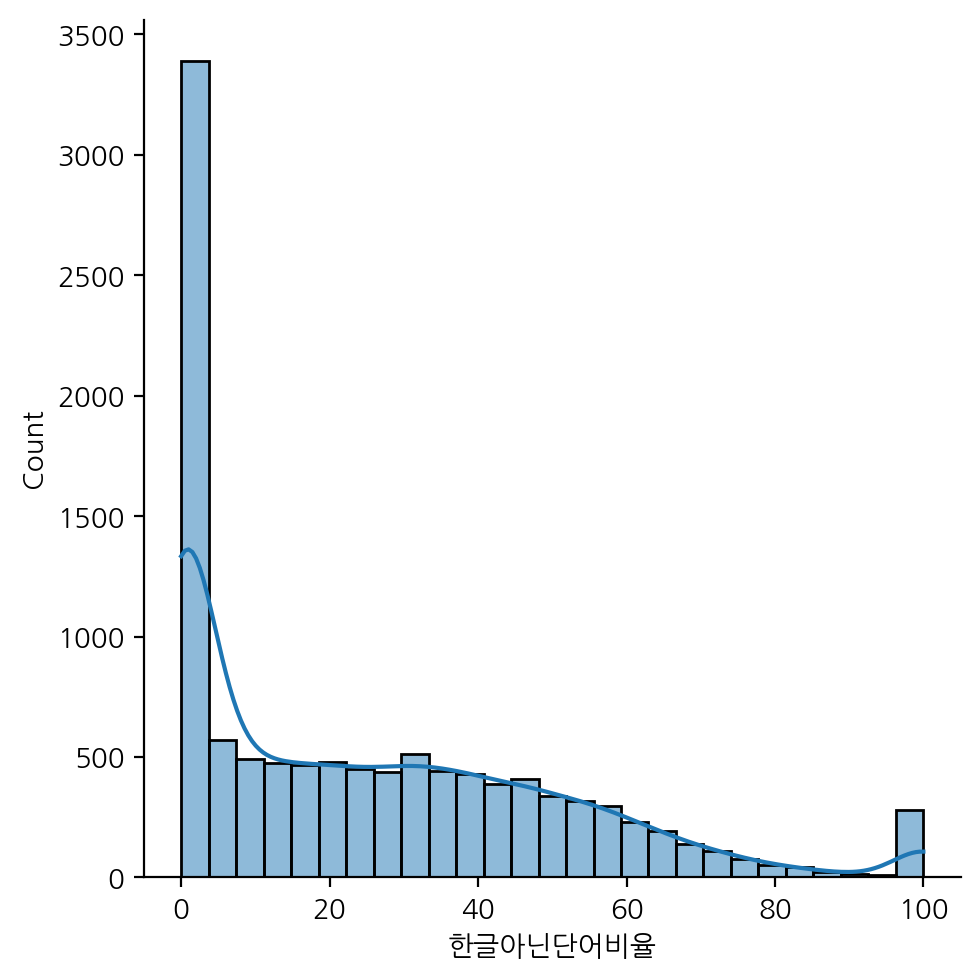

In [52]:
_ = sns.displot(data=dance, x="한글아닌단어비율", kde=True)

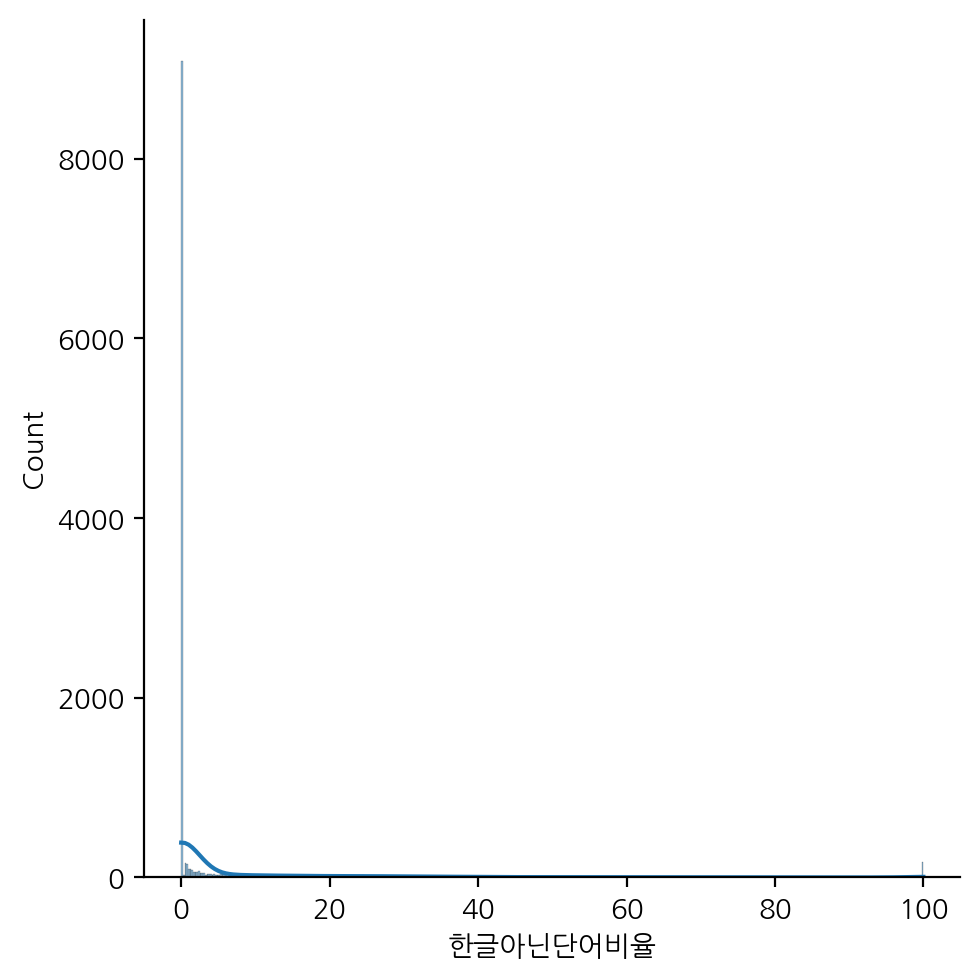

In [53]:
_ = sns.displot(data=ballad, x="한글아닌단어비율", kde=True)

Text(0.5, 1.0, '발라드')

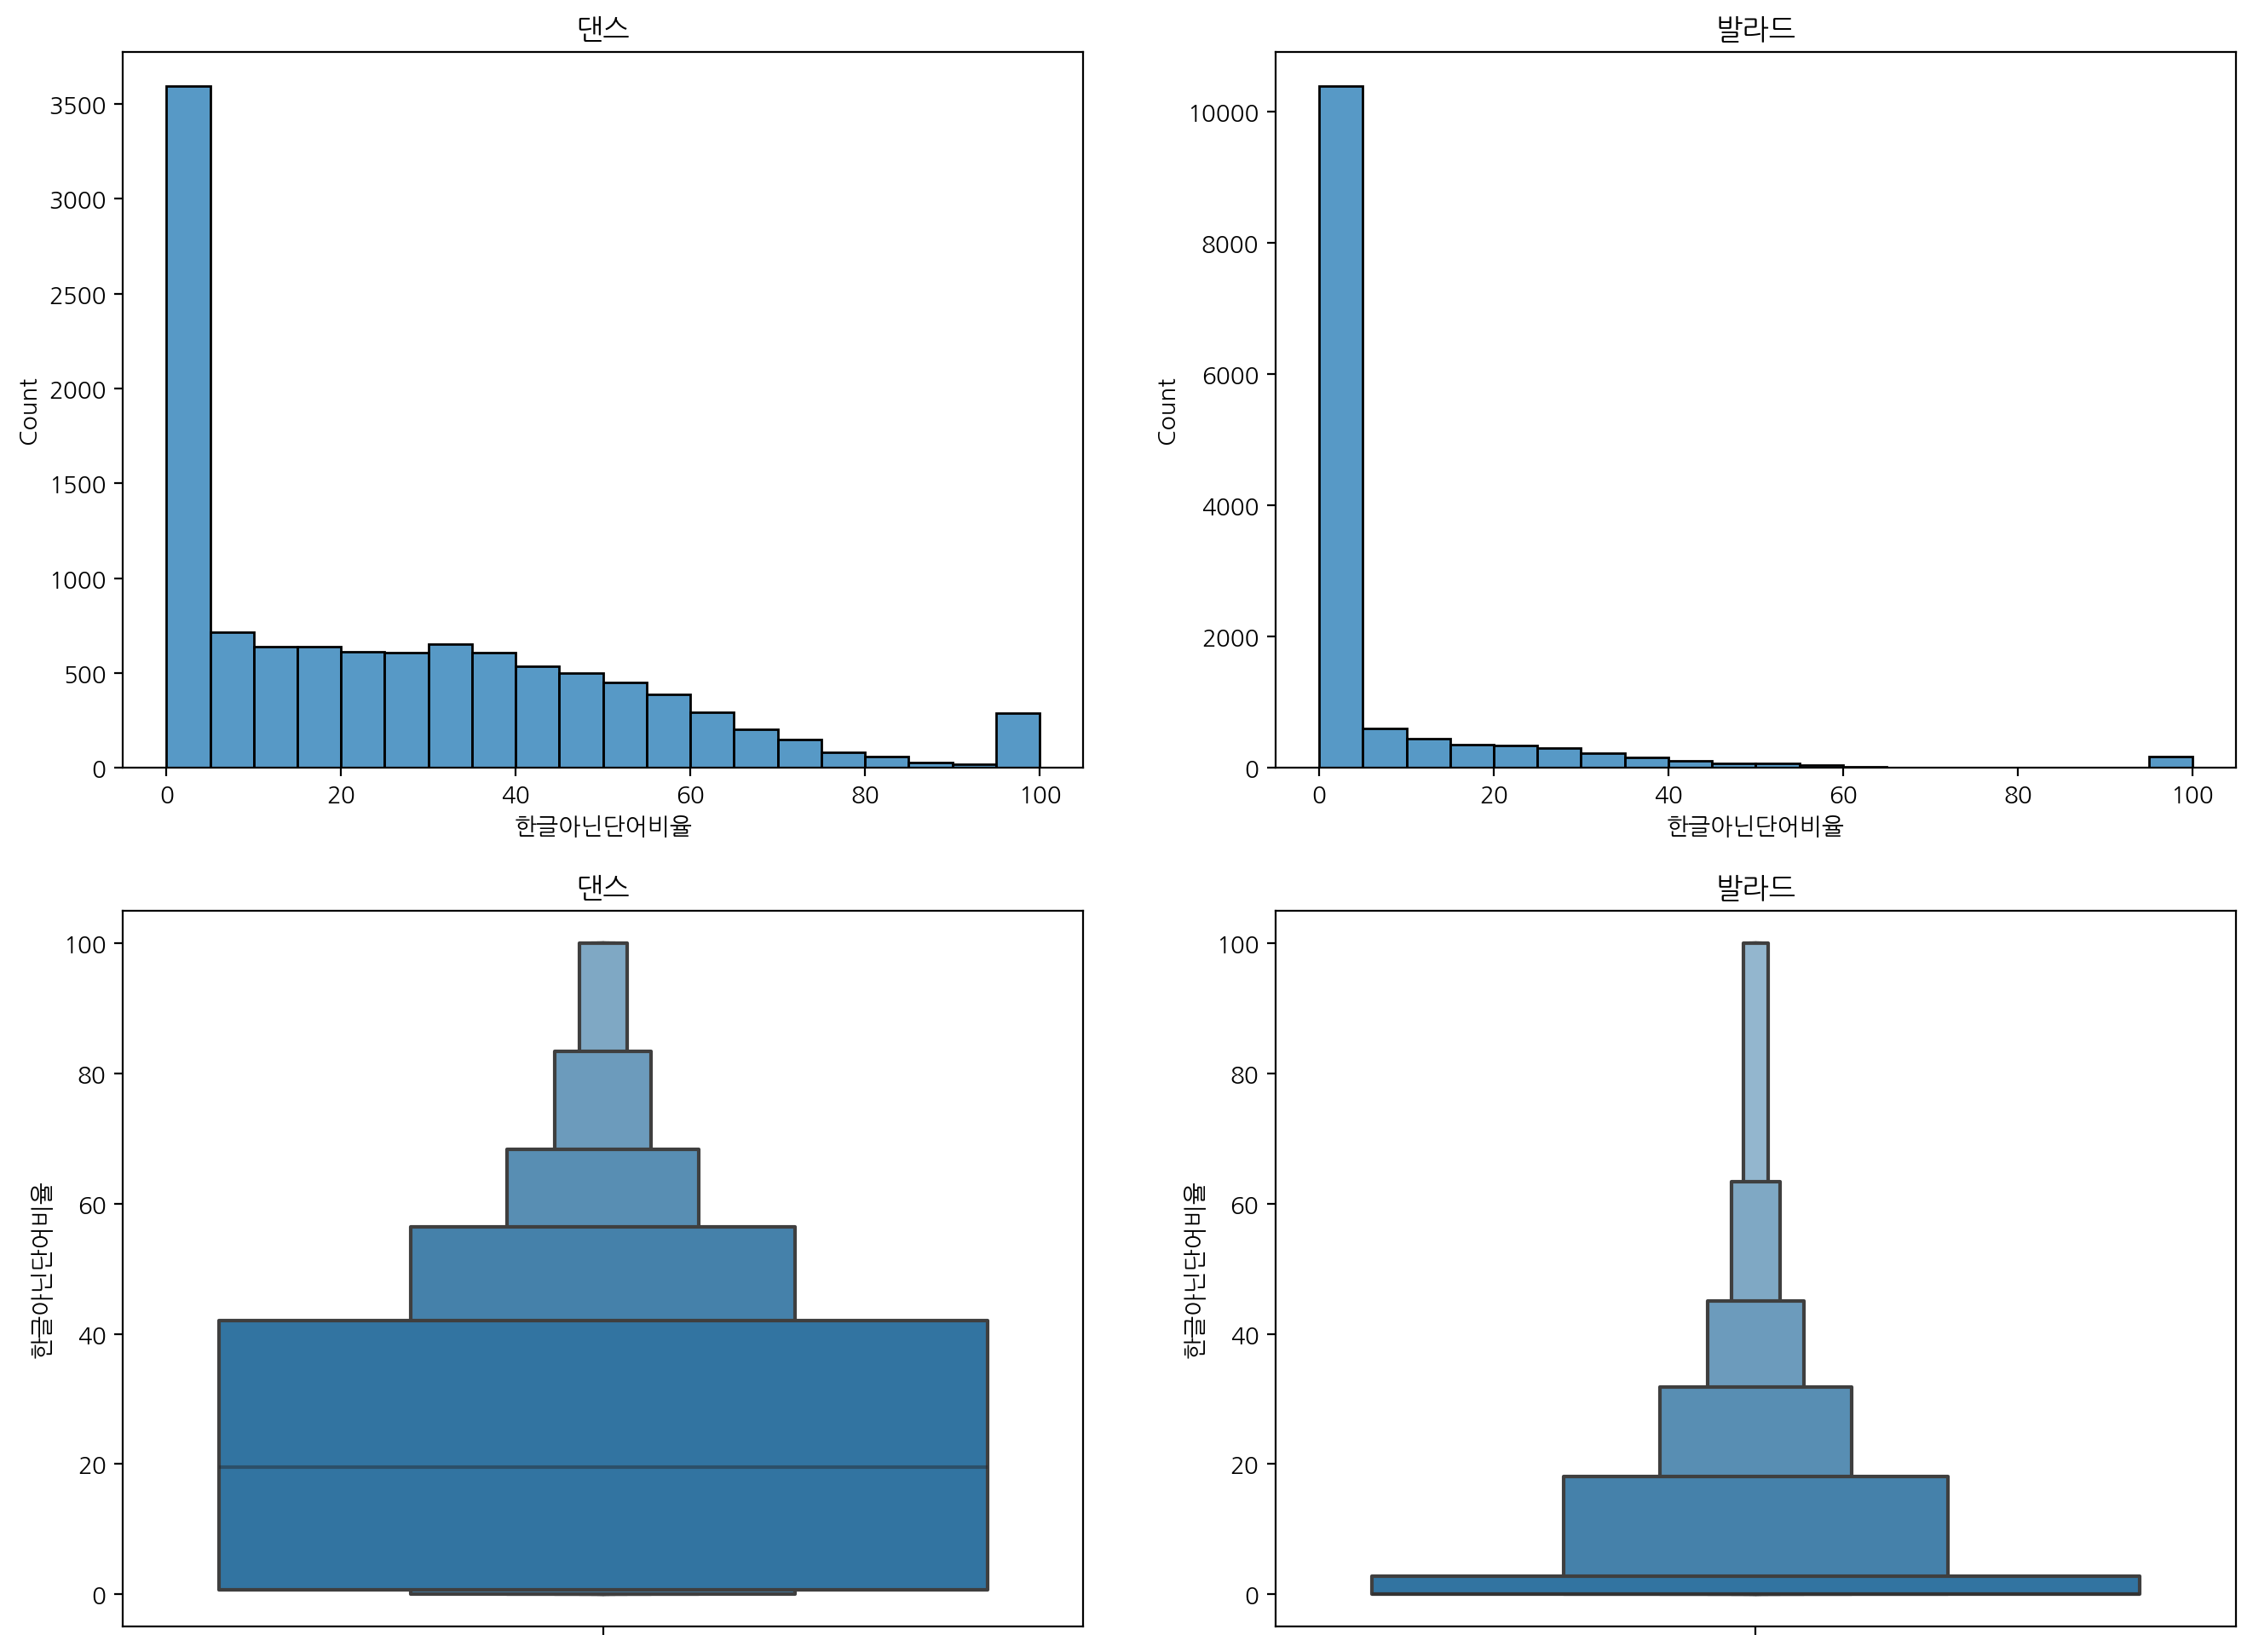

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(data=dance, x="한글아닌단어비율", bins=20, ax=axes[0][0]).set_title("댄스")
sns.histplot(data=ballad, x="한글아닌단어비율", bins=20, ax=axes[0][1]).set_title("발라드")
sns.boxenplot(data=dance, y="한글아닌단어비율", ax=axes[1][0]).set_title("댄스")
sns.boxenplot(data=ballad, y="한글아닌단어비율", ax=axes[1][1]).set_title("발라드")

## 워드클라우드로도 확인해보자

In [55]:
from wordcloud import WordCloud
from konlpy.tag import Okt

In [56]:
from glob import glob

glob("C:\Windows\Fonts\H*.ttf")

['C:\\Windows\\Fonts\\H2GPRM.TTF',
 'C:\\Windows\\Fonts\\H2GSRB.TTF',
 'C:\\Windows\\Fonts\\H2GTRE.TTF',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\H2HDRM.TTF',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\H2MJSM.TTF',
 'C:\\Windows\\Fonts\\H2MKPB.TTF',
 'C:\\Windows\\Fonts\\H2PORL.TTF',
 'C:\\Windows\\Fonts\\H2PORM.TTF',
 'C:\\Windows\\Fonts\\H2SA1M.TTF',
 'C:\\Windows\\Fonts\\HANBaekB.ttf',
 'C:\\Windows\\Fonts\\HANBaekM.ttf',
 'C:\\Windows\\Fonts\\HANBatang.ttf',
 'C:\\Windows\\Fonts\\HANBatangB.ttf',
 'C:\\Windows\\Fonts\\HANBatangExt.ttf',
 'C:\\Windows\\Fonts\\HANCooljazzB.ttf',
 'C:\\Windows\\Fonts\\HANCooljazzL.ttf',
 'C:\\Windows\\Fonts\\HANCooljazzM.ttf',
 'C:\\Windows\\Fonts\\HANDotum.ttf',
 'C:\\Windows\\Fonts\\HANDotumB.ttf',
 'C:\\Windows\\Fonts\\HANDotumExt.ttf',
 'C:\\Windows\\Fonts\\HANSaleB.ttf',
 'C:\\Windows\\Fonts\\HANSaleM.ttf',
 'C:\\Windows\\Fonts\\HANSolB.ttf',
 'C:\\Windows\\Fonts\\HANSolM.ttf',
 'C:\\Windows\\Fonts\\HANSomaB.ttf',
 '

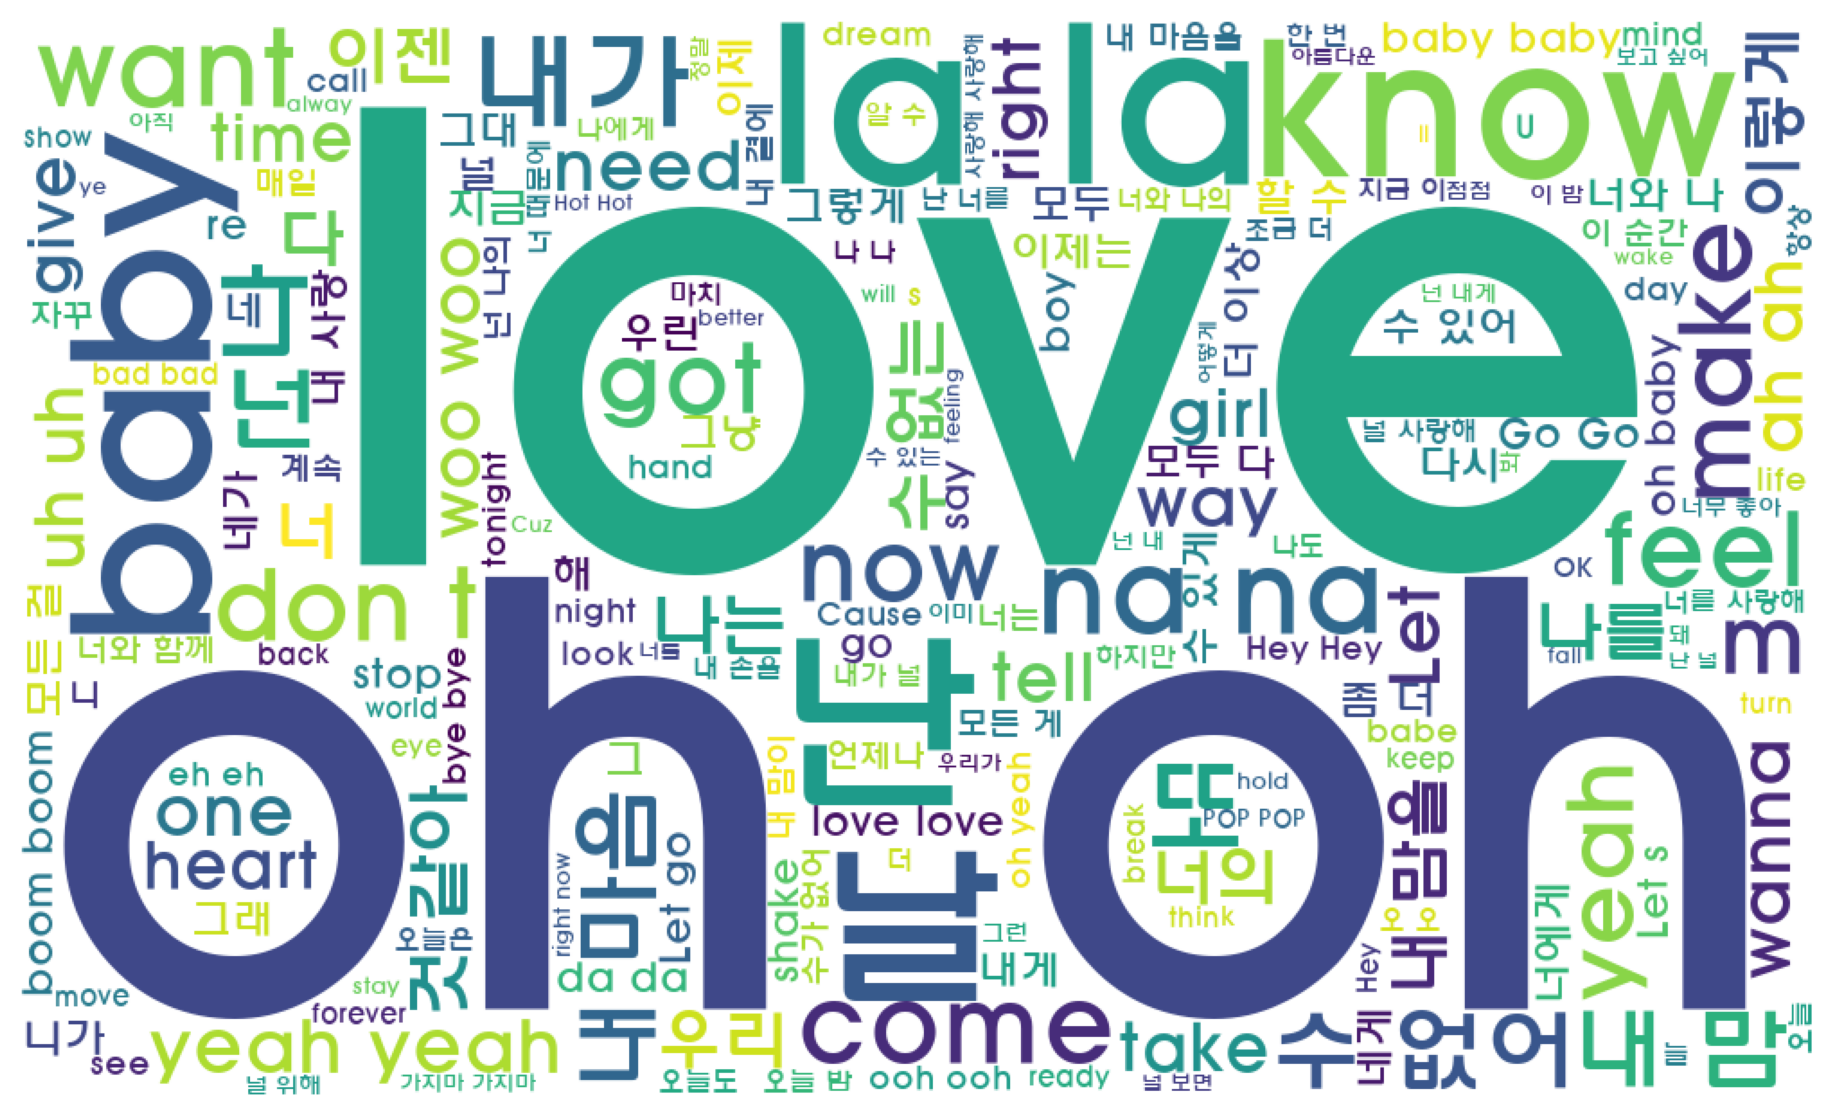

In [57]:
def word_cloud(df, width=1000, height=600):

    # 가사 문자열로 변환
    data = " ".join(df["가사개행제거"])
    
    # word cloud 그리기
    word_draw = WordCloud(
        font_path=r'C:\\Windows\\Fonts\\HYWULM.TTF',
        width=width, height=height,
        # stopwords=["합니다", "입니다"], 
        background_color="white",
        random_state=42,

    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()   

word_cloud(dance)

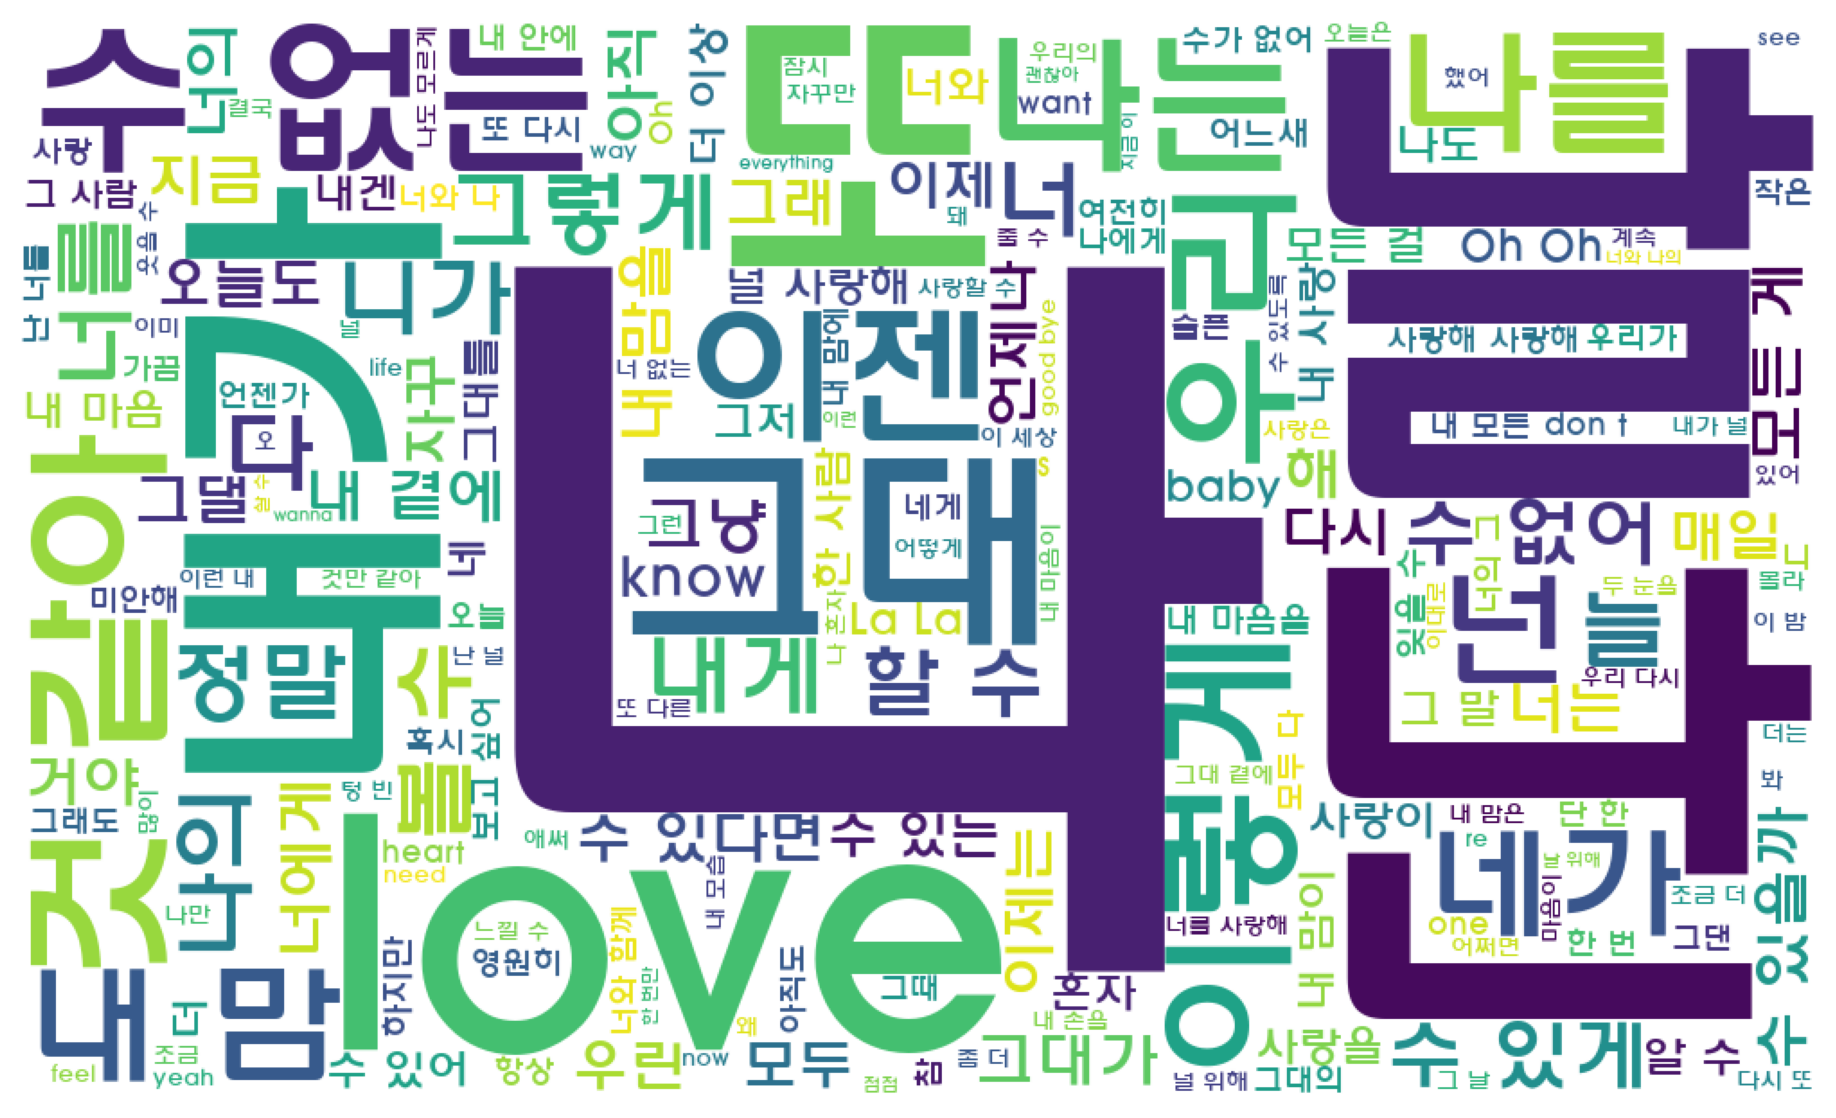

In [58]:
word_cloud(ballad)

### 형태소 확인해보기

In [59]:
okt = Okt()

In [60]:
okt.morphs("보고 싶었어. 가끔 생각했었어. 계절을 타는 건지 니가 그리워서.")

['보고',
 '싶었어',
 '.',
 '가끔',
 '생각',
 '했었어',
 '.',
 '계절',
 '을',
 '타는',
 '건지',
 '니',
 '가',
 '그리워서',
 '.']

In [61]:
okt.nouns("보고 싶었어. 가끔 생각했었어. 계절을 타는 건지 니가 그리워서.")

['보고', '가끔', '생각', '계절', '니']

In [62]:
temp = okt.pos("보고 싶었어. 가끔 생각했었어. 계절을 타는 건지 니가 그리워서.")
temp

[('보고', 'Noun'),
 ('싶었어', 'Verb'),
 ('.', 'Punctuation'),
 ('가끔', 'Noun'),
 ('생각', 'Noun'),
 ('했었어', 'Verb'),
 ('.', 'Punctuation'),
 ('계절', 'Noun'),
 ('을', 'Josa'),
 ('타는', 'Verb'),
 ('건지', 'Verb'),
 ('니', 'Noun'),
 ('가', 'Josa'),
 ('그리워서', 'Adjective'),
 ('.', 'Punctuation')]

In [63]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [64]:
temp_pos = okt.pos(dance["가사개행제거"][0])
temp_pos

[('스위치', 'Noun'),
 ('를', 'Josa'),
 ('켜', 'Noun'),
 ('주사위', 'Noun'),
 ('를', 'Josa'),
 ('던져', 'Verb'),
 ('Let', 'Alpha'),
 ('’', 'Punctuation'),
 ('s', 'Alpha'),
 ('game', 'Alpha'),
 ('start', 'Alpha'),
 ('아무', 'Noun'),
 ('도', 'Josa'),
 ('몰래', 'Noun'),
 ('살짝', 'Noun'),
 ('떨리는', 'Verb'),
 ('두', 'Noun'),
 ('다리', 'Noun'),
 ('설레는', 'Adjective'),
 ('내', 'Noun'),
 ('맘', 'Noun'),
 ('이', 'Josa'),
 ('두근', 'Adverb'),
 ('두근거리는', 'Adjective'),
 ('걸', 'Noun'),
 ('Turn', 'Alpha'),
 ('it', 'Alpha'),
 ('up', 'Alpha'),
 ('turn', 'Alpha'),
 ('it', 'Alpha'),
 ('up', 'Alpha'),
 ('Check', 'Alpha'),
 ('it', 'Alpha'),
 ('out', 'Alpha'),
 ('the', 'Alpha'),
 ('course', 'Alpha'),
 ('방심', 'Noun'),
 ('은', 'Josa'),
 ('금물', 'Noun'),
 ('남다른', 'Adjective'),
 ('내', 'Noun'),
 ('포스', 'Noun'),
 ('your', 'Alpha'),
 ('gonna', 'Alpha'),
 ('be', 'Alpha'),
 ('surprised', 'Alpha'),
 ('복잡한', 'Adjective'),
 ('트랙', 'Noun'),
 ('을', 'Josa'),
 ('거쳐', 'Verb'),
 ('건넌', 'Verb'),
 ('south', 'Alpha'),
 ('of', 'Alpha'),
 ('the', 'Alpha'),
 

In [65]:
def count_pos(lyrics):
    noun = 0
    verb = 0
    adjective = 0 #형용사
    adverb = 0 #부사
    etc = 0

    for word in lyrics:
        if word[1] == "Noun":
            noun += 1
        elif word[1] == "Verb":
            verb += 1
        elif word[1] == "Adjective":
            adjective += 1
        elif word[1] == "Adverb":
            adverb += 1
        else:
            etc += 1
        
    return noun, verb, adjective, adverb, etc

count_pos(temp_pos)


(121, 60, 19, 15, 350)

- 너무 기니까 100개씩만 해보자

In [66]:
dance.shape

(11062, 14)

In [67]:
dance_100 = dance.sample(100)
dance_100.shape

(100, 14)

In [73]:
dance_100["형태소"] = dance_100["가사개행제거"].map(okt.pos)
dance_100["형태소"][:2]

954     [(Don, Alpha), (’, Punctuation), (t, Alpha), (stop, Alpha), (we, Alpha), (have, Alpha), (to, Alpha), (start, Alpha), (We, Alpha), (have, Alpha), (to, Alpha), (start, Alpha), (we, Alpha), (have, Alpha), (to, Alpha), (start, Alpha), (Don, Alpha), (’, Punctuation), (t, Alpha), (stop, Alpha), (we, Alpha), (have, Alpha), (to, Alpha), (start, Alpha), (I, Alpha), (can, Alpha), (’, Punctuation), (t, Alpha), (stop, Alpha), (this, Alpha), (fire, Alpha), (Don, Alpha), (’, Punctuation), (t, Alpha), (stop, Alpha), (we, Alpha), (have, Alpha), (to, Alpha), (start, Alpha), (We, Alpha), (have, Alpha), (to, Alpha), (start, Alpha), (we, Alpha), (have, Alpha), (to, Alpha), (start, Alpha), (Don, Alpha), (’, Punctuation), (t, Alpha), (stop, Alpha), (we, Alpha), (have, Alpha), (to, Alpha), (start, Alpha), (Gimme, Alpha), (gimme, Alpha), (this, Alpha), (fire, Alpha), (Fire, Alpha), (볼, Noun), (게, Josa), (못, VerbPrefix), (돼, Verb), (넌, Noun), (불, Noun), (보듯, Verb), (뻔하니, Adjective), (Liar, Alpha), (커져,

In [70]:
ballad_100 = ballad.sample(100)
ballad_100.shape

(100, 17)

In [72]:
ballad_100["형태소"] = ballad_100["가사개행제거"].map(okt.pos)
ballad_100["형태소"][:2]

3161                                               [(내, Noun), (두, Determiner), (눈, Noun), (엔, Josa), (그대만, Noun), (보여, Verb), (난, Noun), (보이지, Noun), (않아도, Verb), (보여, Verb), (제발, Noun), (그, Noun), (댄, Verb), (그, Noun), (두, Determiner), (눈, Noun), (에도, Josa), (나, Noun), (만, Josa), (보이길, Verb), (다른사람, Noun), (알아보지, Verb), (못, VerbPrefix), (하게, Verb), (내, Noun), (맘, Noun), (속, Noun), (엔, Josa), (그대만, Noun), (살, Noun), (아, Josa), (난, Noun), (그, Noun), (숨결, Noun), (때문, Noun), (에, Josa), (살, Noun), (아, Josa), (제발, Noun), (그대, Noun), (맘속, Noun), (에도, Josa), (나, Noun), (만, Josa), (살길, Noun), (다른사람, Noun), (들어오지, Verb), (못, VerbPrefix), (하게, Verb), (나, Noun), (는, Josa), (바보, Noun), (라서, Josa), (하나, Noun), (만, Josa), (알아요, Verb), (한, Verb), (사람, Noun), (만, Josa), (알아요, Verb), (아프게, Adjective), (눈물, Noun), (흘려도, Verb), (바보, Noun), (가슴, Noun), (이라, Josa), (죽는, Verb), (날, Noun), (까지, Josa), (오직, Noun), (그, Noun), (댈, Verb), (사랑, Noun), (하는, Verb), (일, Noun), (그것, Noun), (밖에, Josa), (몰라요, Verb), (

- 형태소를 세어보자

### 

In [77]:
dance_pos = dance_100["형태소"].map(count_pos)
dance_pos

954       (48, 35, 16, 6, 190)
7105      (92, 47, 19, 16, 54)
9717      (109, 58, 17, 4, 55)
5995        (74, 40, 6, 2, 88)
2125      (82, 43, 15, 3, 108)
                 ...          
2362     (151, 26, 22, 36, 69)
731      (146, 53, 22, 1, 128)
1957      (55, 31, 14, 4, 230)
733      (147, 46, 21, 3, 297)
10919      (92, 44, 16, 4, 59)
Name: 형태소, Length: 100, dtype: object

In [80]:
# noun, verb, adjective, adverb, etc
dance_100["명사"] = dance_pos.str[0]
dance_100["동사"] = dance_pos.str[1]
dance_100["형용사"] = dance_pos.str[2]
dance_100["부사"] = dance_pos.str[3]
dance_100["기타형태소"] = dance_pos.str[4]

In [81]:
dance_100.columns

Index(['제목', '가사', '장르', 'len', 'word_count', 'array', 'max_sentence',
       '가사개행제거', '가사의단어들', '한글단어수', '영어단어수', '숫자단어수', '기타단어수', '한글아닌단어비율',
       '형태소', '명사', '동사', '형용사', '부사', '기타형태소'],
      dtype='object')

In [82]:
dance_100[['형태소', '명사', '동사', '형용사', '부사']].describe()

,명사,동사,형용사,부사
count,100.000000,100.000000,100.000000,100.000000
mean,98.620000,41.010000,17.650000,5.500000
std,46.445097,21.263377,11.177516,5.657747
min,0.000000,0.000000,0.000000,0.000000
25%,71.000000,25.750000,11.750000,2.000000
50%,93.500000,40.500000,17.000000,4.000000
75%,123.000000,57.000000,22.250000,7.000000
max,251.000000,102.000000,79.000000,36.000000


In [83]:
ballad_pos = ballad_100["형태소"].map(count_pos)
ballad_pos

3161       (83, 39, 6, 2, 38)
7744      (74, 48, 21, 3, 39)
7917       (44, 22, 3, 0, 26)
1926      (95, 56, 30, 6, 76)
12307     (73, 38, 15, 8, 20)
                 ...         
41        (94, 32, 24, 3, 45)
10959     (82, 24, 10, 0, 23)
5271     (173, 83, 35, 6, 86)
11632     (68, 30, 10, 5, 55)
3105      (60, 30, 19, 2, 19)
Name: 형태소, Length: 100, dtype: object

In [84]:
# noun, verb, adjective, adverb, etc
ballad_100["명사"] = ballad_pos.str[0]
ballad_100["동사"] = ballad_pos.str[1]
ballad_100["형용사"] = ballad_pos.str[2]
ballad_100["부사"] = ballad_pos.str[3]
ballad_100["기타형태소"] = ballad_pos.str[4]

In [85]:
ballad_100[['형태소', '명사', '동사', '형용사', '부사']].describe()

,명사,동사,형용사,부사
count,100.000000,100.000000,100.000000,100.000000
mean,81.290000,37.460000,16.800000,4.720000
std,24.440112,13.124439,7.998737,3.035414
min,0.000000,0.000000,0.000000,0.000000
25%,67.750000,30.000000,11.750000,2.000000
50%,78.500000,36.000000,16.000000,4.000000
75%,93.250000,46.000000,20.250000,7.000000
max,173.000000,83.000000,45.000000,13.000000


In [92]:
ballad_100.columns

Index(['제목', '가사', '가수', '발매일', '좋아요수', '장르', 'len', 'word_count', 'array',
       'max_sentence', '가사개행제거', '가사의단어들', '한글단어수', '영어단어수', '숫자단어수', '기타단어수',
       '한글아닌단어비율', '형태소', '명사', '동사', '형용사', '부사', '기타형태소'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

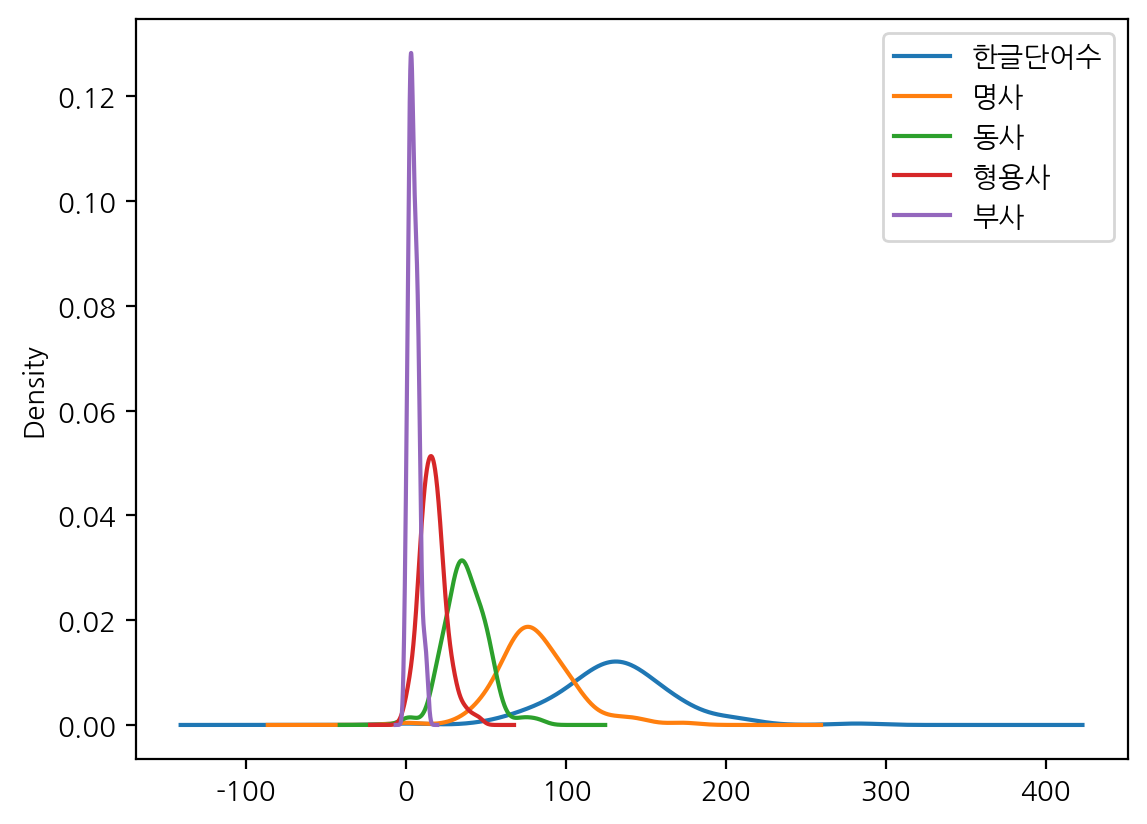

In [94]:
ballad_100[['한글단어수', '형태소', '명사', '동사', '형용사', '부사']].plot(kind="kde")

<AxesSubplot:ylabel='Density'>

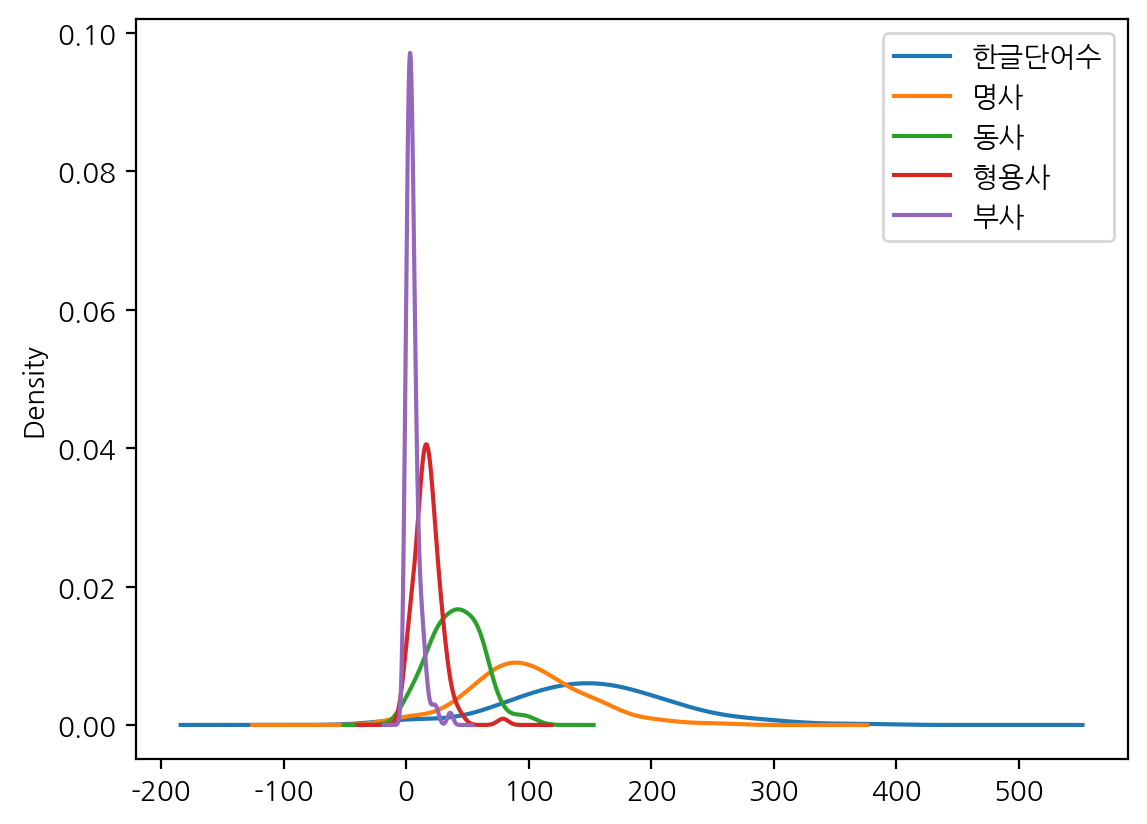

In [95]:
dance_100[['한글단어수', '형태소', '명사', '동사', '형용사', '부사']].plot(kind="kde")